#EASYMONEY

In [3]:
from IPython.display import Image
Image(url='https://lh3.googleusercontent.com/LzCgpXQ_vD9O717mlEV9wzRhhfXVqn8OYnd2guu3wz8bwrlt3B6C7rTk4gwvIO12yJccnayagm8qbiNQlbViixL4n1deIwPTIj79LdgnkDG7RQEfAEY97REmTyVAQZVrCpFr_Wqvh8fmCglKry-Cglj3kDYNIZCHill7ela-X9hYWUvQy4XKJ0vN3LGsgfoJNVqnsd9l9aTIxn6w2I-22k0OEXnAWmrG6zifbUhy4cn097Ub-AqTS_qIivePD3V-SdBKWjNzRT7GcXIWZe3_4dtiIJhbCx_curxwwGfMDNYkuK4BhXmjCzLEeyDpfZHJEoMdUNOp_EyPPPpl2TnHnuGABzyDd0sonYmmhywApURtdQLcyEehzOIg64YxotQg7JBSykfXLbEEYtBaAWz_VpaDF7g73hbJEGxx51Kk5pZZNLvSS8wE9BehEIxv_UQ1ohIzkdY1gNb6-5RoWGvLkOe0KYjTmGopQ7J_1HJCQuqLjZq6UTIkv2pdmCrtuiwef5xAu8JYOQnU6TQCytuMBO9tD3MbpRLCCxGpJNiYEIQ9YNsb7ooRhRrhOR4aneAcTsCeDBGYSz5E9lgw0lHMVi0vHVF79RXorsW0YC5Ed91J1Bd5sHB78gkX4gwBuKa-fUOfHvevPyXu8BPM0etS4ziaxNDaCJSp48Lohpo5XDBfabRF0Tt81CTrtKbGVJGAulSmo-UmWpJI2HthBpL3GR_yhdG6pJ2uVfTuPMjOqU9zPiWpL7YAoKWdRdeqdca7ZFtcZU6ri_cYgIP6bOadYiEXm5daUXjlr5iRE11z-bD1vZMi-J6Qm-r9SPVXHIgIy8CRuNIJBC5UBTvj5aXrHdWtqHOb0uhftq5GtrpKMsVAVIU0w1HES-YHrW7mjrbMDbFUpSo1hWQAYwV44Cb5BKghaRQEj9Tp6nq9jhYbKfE=w566-h262-no?authuser=0')  

#IMPORTAMOS LIBRERIAS

In [4]:
import pandas as pd 
import numpy as np

In [5]:
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder
#from sklearn.base import BaseEstimator, TransformerMixin
#from sklearn.impute import KNNImputer, SimpleImputer
from sklearn import model_selection
from sklearn import metrics
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.cluster import KMeans
#from sklearn.compose import ColumnTransformer

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
import xgboost as xgb
pd.set_option('display.float_format','{:.3f}'.format) 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [7]:
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer, SimpleImputer

In [8]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
import time

In [11]:
 np.random.seed(42)

#FUNCIONES

In [12]:
def OHE(dataframe, column_name):
    _dummy_dataset = pd.get_dummies(dataframe[column_name], prefix=column_name)
    dataframe = pd.concat([dataframe, _dummy_dataset], axis=1)
    return dataframe.drop(column_name, axis=1)

In [13]:
def setGrouped(dataframe, column, num_values,nombre_grupo):
    top_categories = dataframe[column].value_counts().head(num_values)
    top_categories_list = top_categories.index.to_list()
    top_categories_list.append(nombre_grupo)
    dataframe[column]= np.where(~dataframe[column].isin(top_categories_list),nombre_grupo,dataframe[column])
    dataframe[column] = pd.Categorical(dataframe[column], categories=top_categories_list)
    return dataframe[column]

####La función al llamarla agrupará todos los valores con una frecuencia inferior a la definida en un único valor

In [14]:
class ArrayToDataFrame(BaseEstimator, TransformerMixin):
    '''
    Clase que transforma un array en un DataFrame.
    Necesita como parámetros el nombre de las columnas y el índice.
    '''
    
    def __init__(self, columns, index = None):
        self.columns = columns
        self.index = index
        
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        
        if self.index != None:
            df = pd.DataFrame(X, columns = self.columns, index = self.index)
            
        else:
            df = pd.DataFrame(X, columns = self.columns)
            
        return df

#IMPORTAMOS DATOS

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
REC=pd.read_pickle("/content/drive/MyDrive/TFM/data/REC_pck")

#PREPROCESSING

In [ ]:
REC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5962924 entries, 0 to 5962923
Data columns (total 34 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   ID_USR                     object        
 1   FECHA_PARTICION            datetime64[ns]
 2   PAIS                       object        
 3   REGION(ESP)                object        
 4   SEXO                       object        
 5   EDAD                       int64         
 6   FALLECIDO/A                object        
 7   SALARIO                    float64       
 8   SEGMENTO                   object        
 9   RANGO_SALARIAL             category      
 10  DE_ESPAÑA                  object        
 11  COM.AUTONOMA_ESP           object        
 12  RANGO_EDAD                 category      
 13  PROD_DEPOSITO_CP           int64         
 14  PROD_PRESTAMOS             int64         
 15  PROD_HIPOTECA              int64         
 16  PROD_FONDOS                int64    

In [ ]:
#Eliminamos movimientos de fallecidos pero 
#¡OJO! Hay movimientos de fallecidos lo que es un error o quizá un fraude. Sugiero investigar.

REC.drop(REC[REC['FALLECIDO/A']=='S'].index, axis=0 , inplace=True)
REC.drop('FALLECIDO/A', axis=1, inplace = True)

In [ ]:
#Eliminamos variables que derivan de o han derivado en otras
eliminar=['PAIS','RANGO_EDAD','RANGO_SALARIAL','VAR_PROD','REGION(ESP)']
REC.drop(eliminar, axis=1, inplace = True)

In [ ]:
REC.describe(exclude=np.number).T

<ipython-input-18-d64505f95e23>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  REC.describe(exclude=np.number).T


,count,unique,top,freq,first,last
ID_USR,5961849.000,456318.000,1375586.000,17.000,NaT,NaT
FECHA_PARTICION,5961849,17,2019-05-28 00:00:00,442909,2018-01-28,2019-05-28
SEXO,5961849,3,M,3087137,NaT,NaT
SEGMENTO,5961849,4,03 - UNIVERSITARIO,3900109,NaT,NaT
DE_ESPAÑA,5961849,2,SI,5959602,NaT,NaT
COM.AUTONOMA_ESP,5961849,19,MADRID,1185394,NaT,NaT
STATUS_CLIENTE,5961849,6,CLIENTE FIDELIZADO,4246995,NaT,NaT
CANAL_ENTRADA,5961849,69,KHE,3113881,NaT,NaT
ACTIVO/A,5961849,2,False,3557216,NaT,NaT


In [ ]:
min_perc=0.01
min_inc=(REC['CANAL_ENTRADA'].value_counts(normalize=True) > min_perc ).sum()

In [ ]:
setGrouped(REC,'CANAL_ENTRADA', min_inc,'Var')

0          Var
1          KHE
2          KHE
3          KHD
4          KHE
          ... 
5962919    KHE
5962920    KHE
5962921    KHE
5962922    KHE
5962923    DES
Name: CANAL_ENTRADA, Length: 5961849, dtype: category
Categories (12, object): ['KHE', 'KFC', 'KHQ', 'KAT', ..., 'KFA', 'KHD', 'RED', 'Var']

In [ ]:
Label=['DE_ESPAÑA','ACTIVO/A','STATUS_CLIENTE','COM.AUTONOMA_ESP','CANAL_ENTRADA']

In [ ]:
OneHot=['SEXO','SEGMENTO']

In [ ]:
for i in Label:
  REC[i]=LabelEncoder().fit_transform(REC[[i]]).astype(int)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [ ]:
for i in OneHot:
  REC=OHE(REC,i)

In [ ]:
REC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5961849 entries, 0 to 5962923
Data columns (total 33 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   ID_USR                       object        
 1   FECHA_PARTICION              datetime64[ns]
 2   EDAD                         int64         
 3   SALARIO                      float64       
 4   DE_ESPAÑA                    int64         
 5   COM.AUTONOMA_ESP             int64         
 6   PROD_DEPOSITO_CP             int64         
 7   PROD_PRESTAMOS               int64         
 8   PROD_HIPOTECA                int64         
 9   PROD_FONDOS                  int64         
 10  PROD_VALORES                 int64         
 11  PROD_DEPOSITOS_LP            int64         
 12  PROD_CUENTA_EM++             int64         
 13  PROD_TARJETA_CREDITO         int64         
 14  PROD_DOMICILIACIONES         int64         
 15  PROD_PLAN_PENSIONES          int64         
 16  

In [ ]:
pd.to_pickle(REC,"/content/drive/MyDrive/TFM/data/REC2_pck")

In [ ]:
REC=pd.read_pickle("/content/drive/MyDrive/TFM/data/REC2_pck")

#Análisis de los target

In [ ]:
REC.columns

Index(['ID_USR', 'FECHA_PARTICION', 'EDAD', 'SALARIO', 'DE_ESPAÑA',
       'COM.AUTONOMA_ESP', 'PROD_DEPOSITO_CP', 'PROD_PRESTAMOS',
       'PROD_HIPOTECA', 'PROD_FONDOS', 'PROD_VALORES', 'PROD_DEPOSITOS_LP',
       'PROD_CUENTA_EM++', 'PROD_TARJETA_CREDITO', 'PROD_DOMICILIACIONES',
       'PROD_PLAN_PENSIONES', 'PROD_CUENTA_BON_DOMICILIA',
       'PROD_CUENTA_EM_CRYPTO', 'PROD_TARJETA_DEBITO', 'PROD_CUENTA_EM+',
       'PROD_CUENTA_EM', 'TOTAL_PROD', 'STATUS_CLIENTE', 'CANAL_ENTRADA',
       'ACTIVO/A', 'ANTIGUEDAD_MESES', 'SEXO_H', 'SEXO_M', 'SEXO_ND',
       'SEGMENTO_01 - TOP', 'SEGMENTO_02 - PARTICULARES',
       'SEGMENTO_03 - UNIVERSITARIO', 'SEGMENTO_04 - OTROS'],
      dtype='object')

In [ ]:
TARGET=['PROD_DEPOSITO_CP', 'PROD_PRESTAMOS','PROD_HIPOTECA', 'PROD_FONDOS','PROD_VALORES', 
        'PROD_DEPOSITOS_LP', 'PROD_CUENTA_EM++','PROD_TARJETA_CREDITO', 'PROD_DOMICILIACIONES', 
        'PROD_PLAN_PENSIONES','PROD_CUENTA_BON_DOMICILIA', 'PROD_CUENTA_EM_CRYPTO',
        'PROD_TARJETA_DEBITO', 'PROD_CUENTA_EM+', 'PROD_CUENTA_EM'
        ]

In [ ]:
REC[TARGET].nunique()

PROD_DEPOSITO_CP             2
PROD_PRESTAMOS               2
PROD_HIPOTECA                2
PROD_FONDOS                  2
PROD_VALORES                 2
PROD_DEPOSITOS_LP            2
PROD_CUENTA_EM++             1
PROD_TARJETA_CREDITO         2
PROD_DOMICILIACIONES         2
PROD_PLAN_PENSIONES          2
PROD_CUENTA_BON_DOMICILIA    2
PROD_CUENTA_EM_CRYPTO        2
PROD_TARJETA_DEBITO          2
PROD_CUENTA_EM+              2
PROD_CUENTA_EM               2
dtype: int64

In [ ]:
for i in TARGET:
  print(REC[i].value_counts(normalize=True))

0   0.997
1   0.003
Name: PROD_DEPOSITO_CP, dtype: float64
0   1.000
1   0.000
Name: PROD_PRESTAMOS, dtype: float64
0   1.000
1   0.000
Name: PROD_HIPOTECA, dtype: float64
0   0.997
1   0.003
Name: PROD_FONDOS, dtype: float64
0   0.996
1   0.004
Name: PROD_VALORES, dtype: float64
0   0.983
1   0.017
Name: PROD_DEPOSITOS_LP, dtype: float64
0   1.000
Name: PROD_CUENTA_EM++, dtype: float64
0   0.988
1   0.012
Name: PROD_TARJETA_CREDITO, dtype: float64
0   0.965
1   0.035
Name: PROD_DOMICILIACIONES, dtype: float64
0   0.963
1   0.037
Name: PROD_PLAN_PENSIONES, dtype: float64
0   0.945
1   0.055
Name: PROD_CUENTA_BON_DOMICILIA, dtype: float64
0   0.945
1   0.055
Name: PROD_CUENTA_EM_CRYPTO, dtype: float64
0   0.906
1   0.094
Name: PROD_TARJETA_DEBITO, dtype: float64
0   1.000
1   0.000
Name: PROD_CUENTA_EM+, dtype: float64
1   0.735
0   0.265
Name: PROD_CUENTA_EM, dtype: float64


El producto Cuenta EM++ no se ha vendido nunca, por lo que la probabilidad de venta es del 0% y la eliminamos del modelo porque no aporta

In [ ]:
REC.drop('PROD_CUENTA_EM++', axis=1, inplace = True)
TARGET.remove('PROD_CUENTA_EM++')

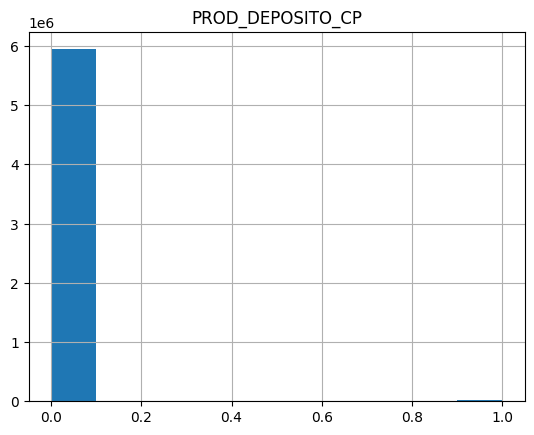

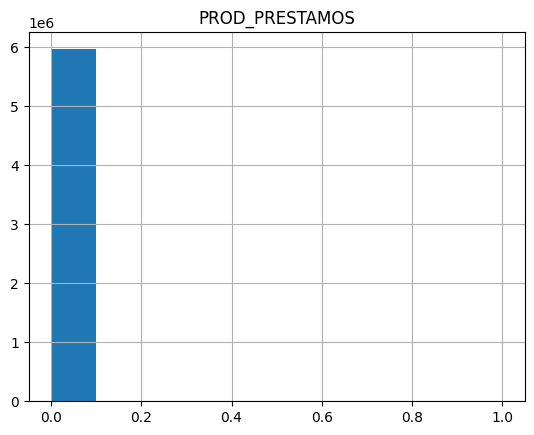

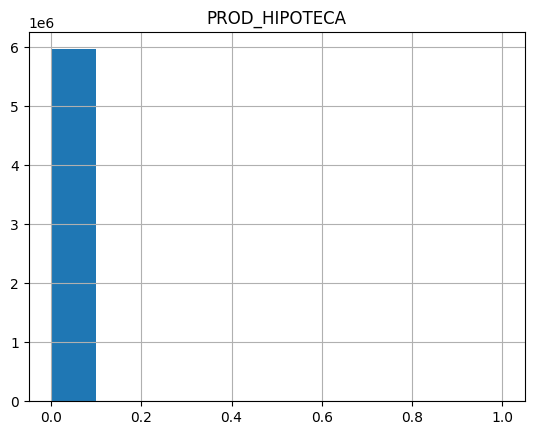

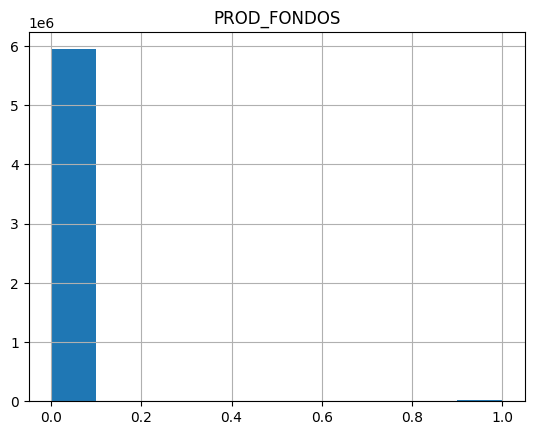

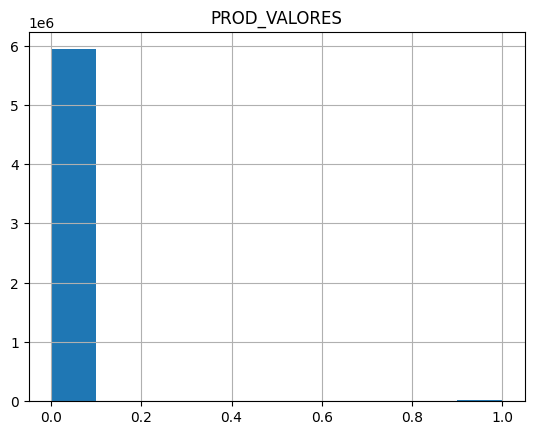

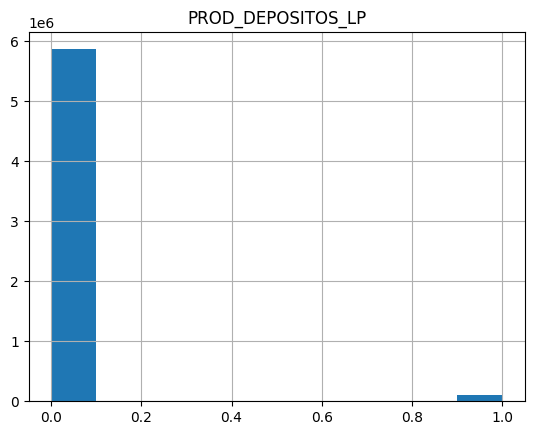

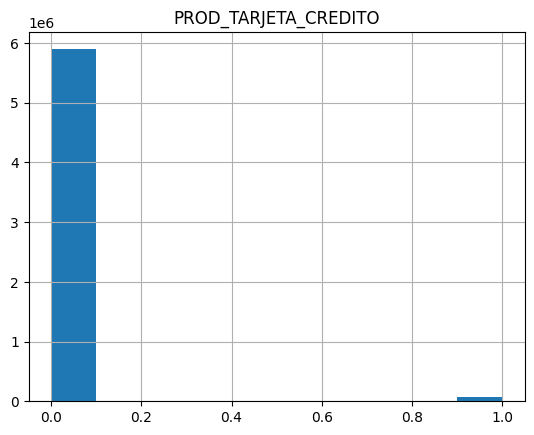

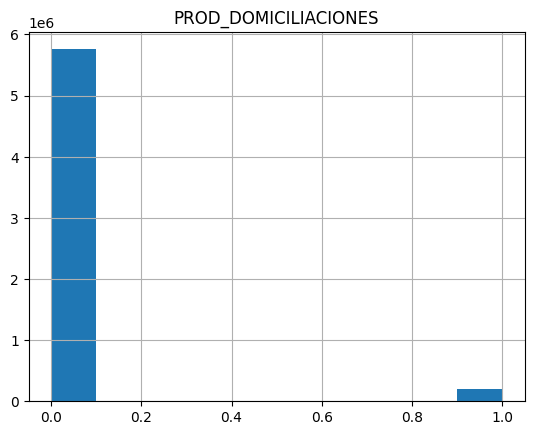

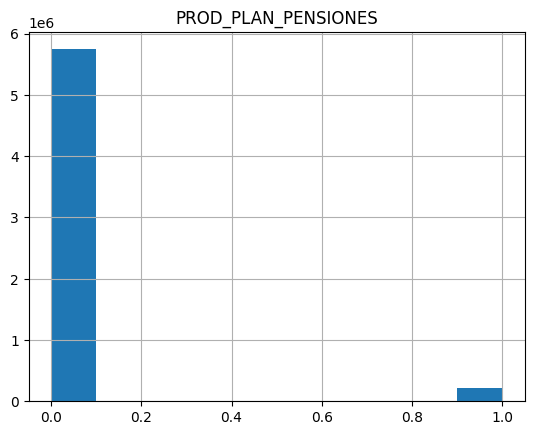

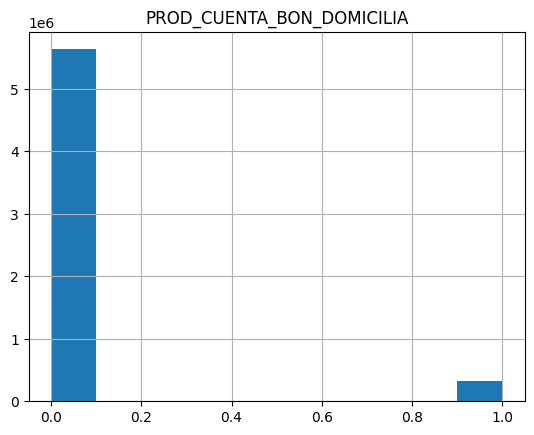

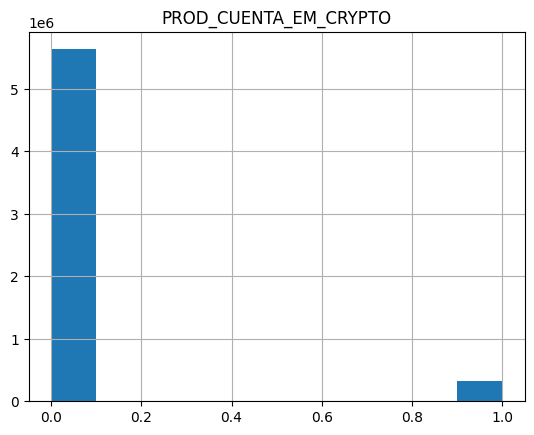

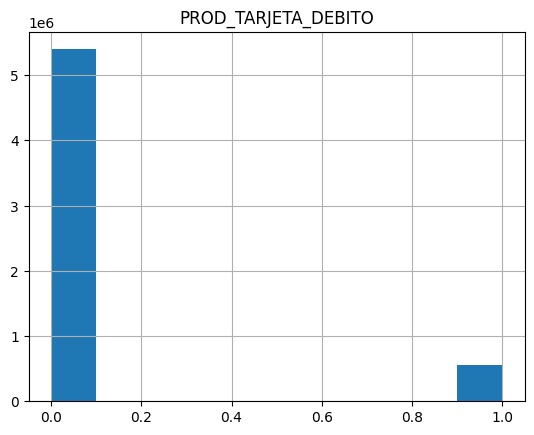

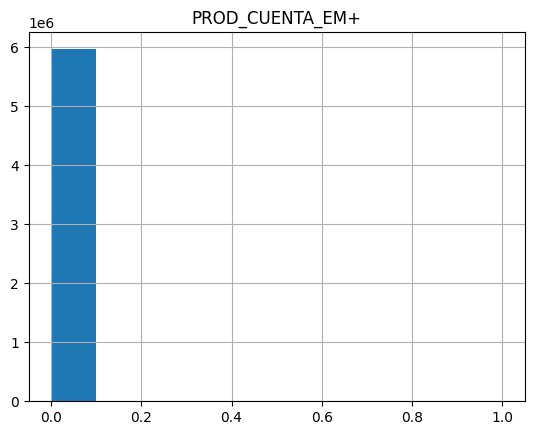

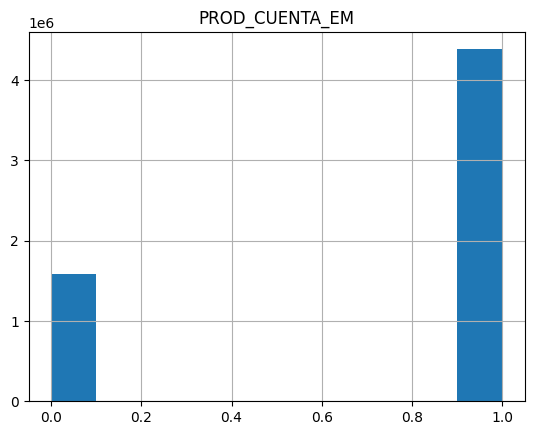

In [ ]:
for i in TARGET:
        REC.hist(column=i)

In [ ]:
pd.to_pickle(REC,"/content/drive/MyDrive/TFM/data/REC3_pck")

#MODELO

In [ ]:
REC_MOD=pd.read_pickle("/content/drive/MyDrive/TFM/data/REC3_pck")

In [ ]:
REC_MOD.set_index("ID_USR", inplace = True)
lc = [

      'FECHA_PARTICION', #no eliminar, se usa para partit dev/val y luego se elimina
      'EDAD', 
      'SALARIO', 
      'DE_ESPAÑA', 
      'COM.AUTONOMA_ESP',
      'PROD_DEPOSITO_CP', 'PROD_PRESTAMOS', 'PROD_HIPOTECA', 'PROD_FONDOS','PROD_VALORES', 'PROD_DEPOSITOS_LP',
      'PROD_TARJETA_CREDITO', 'PROD_DOMICILIACIONES', 'PROD_PLAN_PENSIONES',
      'PROD_CUENTA_BON_DOMICILIA', 'PROD_CUENTA_EM_CRYPTO',
      'PROD_TARJETA_DEBITO', 'PROD_CUENTA_EM+', 'PROD_CUENTA_EM',
#      'TOTAL_PROD', 
#      'STATUS_CLIENTE', 
      'CANAL_ENTRADA', 
      'ACTIVO/A',
      'ANTIGUEDAD_MESES', 
      'SEXO_H', 'SEXO_M', 'SEXO_ND', 
      'SEGMENTO_01 - TOP','SEGMENTO_02 - PARTICULARES', 'SEGMENTO_03 - UNIVERSITARIO','SEGMENTO_04 - OTROS'
]

REC_MOD = REC_MOD[lc]

/usr/local/lib/python3.9/dist-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


##Estrategia de validación

In [ ]:
REC_MOD.pivot_table(index=['FECHA_PARTICION'], values=TARGET[0], aggfunc=len)

,PROD_DEPOSITO_CP
FECHA_PARTICION,
2018-01-28,239446
2018-02-28,242474
2018-03-28,245211
2018-04-28,247417
2018-05-28,249879
2018-06-28,252059
2018-07-28,339284
2018-08-28,352865
2018-09-28,375259


Entrenaremos el modelo con los registros anteriores a Mayo de 2019 dejando este último mes para validar la calidad del modelo así como para realizar las predicciones

In [ ]:
dev_REC_MOD = REC_MOD[(REC_MOD['FECHA_PARTICION'] < '2019-05-28') ] # development = train + test
val_REC_MOD = REC_MOD[(REC_MOD['FECHA_PARTICION'] >= '2019-05-28')] # validation

In [ ]:
dev_REC_MOD.drop('FECHA_PARTICION', axis=1, inplace = True)
val_REC_MOD.drop('FECHA_PARTICION', axis=1, inplace = True)

<ipython-input-39-bda44ea5965f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dev_REC_MOD.drop('FECHA_PARTICION', axis=1, inplace = True)
<ipython-input-39-bda44ea5965f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_REC_MOD.drop('FECHA_PARTICION', axis=1, inplace = True)


In [ ]:
dev_REC_MOD.shape

(5518940, 28)

In [ ]:
val_REC_MOD.shape

(442909, 28)

In [ ]:
###

##Evaluación de algoritmos

In [ ]:
target=TARGET[0]

In [ ]:
dev_REC_MOD_x = dev_REC_MOD.drop(target, axis=1)
dev_REC_MOD_y = dev_REC_MOD[[target]]

In [ ]:
dev_REC_MOD_x.head().T

ID_USR,1375586,1050611,1050612,1050613,1050614
EDAD,35.000,23.000,23.000,22.000,23.000
SALARIO,87218.100,35548.740,122179.110,119775.540,0.000
DE_ESPAÑA,1.000,1.000,1.000,1.000,1.000
COM.AUTONOMA_ESP,0.000,6.000,6.000,1.000,1.000
PROD_PRESTAMOS,0.000,0.000,0.000,0.000,0.000
PROD_HIPOTECA,0.000,0.000,0.000,0.000,0.000
PROD_FONDOS,0.000,0.000,0.000,0.000,0.000
PROD_VALORES,0.000,0.000,0.000,0.000,0.000
PROD_DEPOSITOS_LP,0.000,0.000,0.000,0.000,0.000
PROD_TARJETA_CREDITO,0.000,0.000,0.000,0.000,0.000


In [ ]:
dev_REC_MOD_y.head().T

ID_USR,1375586,1050611,1050612,1050613,1050614
PROD_DEPOSITO_CP,0,0,0,1,0


In [ ]:
val_REC_MOD_x = dev_REC_MOD.drop(target, axis=1)
val_REC_MOD_y = dev_REC_MOD[[target]]

In [ ]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(
                                        dev_REC_MOD_x, # X 
                                        dev_REC_MOD_y, # y
                                        test_size = 0.30, # tamaño del split aleatorio 
                                        random_state = 42
                                     )

Comparativa

In [ ]:
for i in range(5, 20):
    dt = DecisionTreeClassifier(max_depth=i, random_state=42, min_samples_split=1000)
    dt.fit(X_train, Y_train)
    train_accuracy = dt.score(X_train, Y_train)
    test_accuracy = dt.score(X_test, Y_test)
    print('Profundidad del árbol: {}. Train: {} - Test: {}'.format(i, train_accuracy, test_accuracy))

Profundidad del árbol: 5. Train: 0.9972427417480272 - Test: 0.997303226102597
Profundidad del árbol: 6. Train: 0.997309265909758 - Test: 0.9973793276728261
Profundidad del árbol: 7. Train: 0.9973307503666594 - Test: 0.997396239132877
Profundidad del árbol: 8. Train: 0.9973949448884853 - Test: 0.9974723407031061
Profundidad del árbol: 9. Train: 0.9974340310691132 - Test: 0.9975146193532333
Profundidad del árbol: 10. Train: 0.9974713053075928 - Test: 0.9975411945047419
Profundidad del árbol: 11. Train: 0.9974824358093609 - Test: 0.9975484422733351
Profundidad del árbol: 12. Train: 0.9974925309156157 - Test: 0.997559313926225
Profundidad del árbol: 13. Train: 0.997503661417384 - Test: 0.9975677696562504
Profundidad del árbol: 14. Train: 0.997505214510654 - Test: 0.9975665616948182
Profundidad del árbol: 15. Train: 0.9975065087550457 - Test: 0.997565353733386
Profundidad del árbol: 16. Train: 0.9975080618483156 - Test: 0.9975635417912377
Profundidad del árbol: 17. Train: 0.9975088383949506

In [ ]:
RANDOM_STATE = 42
n_estimators = 40
max_depth = 17
min_samples_split=1000

models = [ 
    ('DecisionTree', DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=RANDOM_STATE)),
    ('RandomForest', RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, random_state=RANDOM_STATE)),
    ('GradientBoosting', GradientBoostingClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, random_state=RANDOM_STATE))
]

In [ ]:
dt=models[0][1]
clf=models[1][1]
gb=models[2][1]

ROC AUC Score for DecisionTree: 0.9802389060788715
ROC AUC Score for RandomForest: 0.9917004587401119
ROC AUC Score for GradientBoosting: 0.9647096327191036


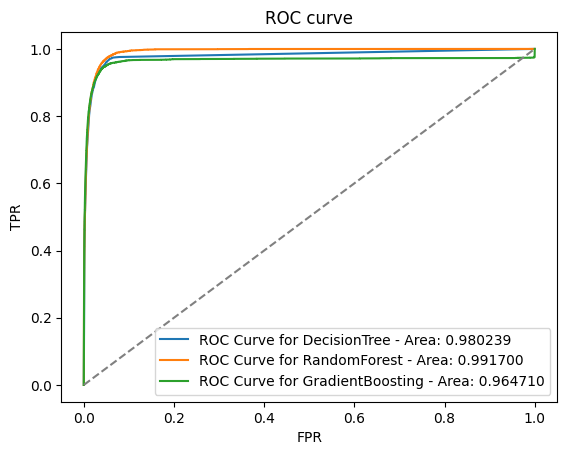

In [ ]:
plt.clf()
for model in models:
    model_name = model[0]
    model_instance = model[1]
    model_instance.fit(X_train, np.ravel(Y_train))
    predictions = model_instance.predict_proba(X_test)[:,1]
    auc_score = metrics.roc_auc_score(Y_test, predictions)
    print('ROC AUC Score for {}: {}'.format(model_name, auc_score))
    fpr, tpr, _ = metrics.roc_curve(Y_test, predictions)
    plt.plot(fpr, tpr, label='ROC Curve for {} - Area: {:2f}'.format(model_name, auc_score))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.title('ROC curve')
plt.show()

Vamos a optar por un RandomForest

In [ ]:
###

##Entrenamientos y obtención de probabilidad

Vamos a aplicar el mismo modelo para cada uno de los productos que tenemos en el target para obtener la probabilidad de cada uno para cada cliente. 

Para ello, para cada producto:

- Cargamos el dataset de resultados (PROB) desde el pickle a tal efecto

- Entrenaremos el modelo con las mismas particiones con las que hemos realizado la evaluación pero cambiando el target al producto de estudio

- Posteriormente utilizaremos el último mes para realizar la predicción por ser el más parecido a la realidad

- El resultado lo guardaremos en PROB y lo exportaremos a pickle para evitar empezar de 0 si el sistema no aguanta

Al final tendremos el dataset PROB con la probabilidad porcentual de compra y el retorno esperado de cada producto para cada cliente


In [ ]:
PROB=pd.read_pickle("/content/drive/MyDrive/TFM/data/REC2_pck")

In [ ]:
PROB.set_index("ID_USR", inplace = True)
lc = [
      'FECHA_PARTICION', 
      'PROD_DEPOSITO_CP', 'PROD_PRESTAMOS', 'PROD_HIPOTECA', 'PROD_FONDOS','PROD_VALORES', 'PROD_DEPOSITOS_LP',
      'PROD_TARJETA_CREDITO', 'PROD_DOMICILIACIONES', 'PROD_PLAN_PENSIONES',
      'PROD_CUENTA_BON_DOMICILIA', 'PROD_CUENTA_EM_CRYPTO',
      'PROD_TARJETA_DEBITO', 'PROD_CUENTA_EM+', 'PROD_CUENTA_EM',
]

PROB = PROB[lc]

/usr/local/lib/python3.9/dist-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


In [ ]:
GB_PROB = PROB.groupby("FECHA_PARTICION")

In [ ]:
PROB=GB_PROB.get_group('2019-05-28') #DF para guardar las probabilidades según el último mes y operar con ellas

In [ ]:
REC_MOD=pd.read_pickle("/content/drive/MyDrive/TFM/data/REC3_pck")

In [ ]:
GB_REC = REC_MOD.groupby("FECHA_PARTICION")

In [ ]:
cuentas=[
      'PROD_CUENTA_EM++', 
      'PROD_DOMICILIACIONES',
      'PROD_CUENTA_BON_DOMICILIA',
      'PROD_CUENTA_EM_CRYPTO', 
      'PROD_CUENTA_EM+',
      'PROD_CUENTA_EM'
]

ahorro=[
      'PROD_DEPOSITO_CP', 
      'PROD_FONDOS', 
      'PROD_VALORES', 
      'PROD_DEPOSITOS_LP',   
      'PROD_PLAN_PENSIONES', 
]

financiacion=[
      'PROD_PRESTAMOS',
      'PROD_HIPOTECA', 
      'PROD_TARJETA_CREDITO', 
      'PROD_TARJETA_DEBITO',       
]

In [ ]:
clf=RandomForestClassifier(n_estimators=50, max_depth=17, min_samples_split=1000, random_state=42)

###Depósitos CP

In [ ]:
target=TARGET[0]

In [ ]:
target

'PROD_DEPOSITO_CP'

In [ ]:
REC_PRED=GB_REC.get_group('2019-05-28') #Hemos entrenado con REC_MOD al completo, pero vamos a predecir con este subset del último mes

In [ ]:
REC_PRED.set_index("ID_USR", inplace = True)

/usr/local/lib/python3.9/dist-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


In [ ]:
lc = [
      'EDAD', 
      'SALARIO', 
      'DE_ESPAÑA', 
      'COM.AUTONOMA_ESP',
      'PROD_DEPOSITO_CP', 'PROD_PRESTAMOS', 'PROD_HIPOTECA', 'PROD_FONDOS','PROD_VALORES', 'PROD_DEPOSITOS_LP',
      'PROD_TARJETA_CREDITO', 'PROD_DOMICILIACIONES', 'PROD_PLAN_PENSIONES',
      'PROD_CUENTA_BON_DOMICILIA', 'PROD_CUENTA_EM_CRYPTO',
      'PROD_TARJETA_DEBITO', 'PROD_CUENTA_EM+', 'PROD_CUENTA_EM',
      'CANAL_ENTRADA', 
      'ACTIVO/A',
      'ANTIGUEDAD_MESES', 
      'SEXO_H', 'SEXO_M', 'SEXO_ND', 
      'SEGMENTO_01 - TOP','SEGMENTO_02 - PARTICULARES', 'SEGMENTO_03 - UNIVERSITARIO','SEGMENTO_04 - OTROS'
]


In [ ]:
lc.remove(target)

In [ ]:
REC_PRED=REC_PRED[lc]

In [ ]:
dev_REC_MOD.shape

(5518940, 28)

In [ ]:
val_REC_MOD.shape

(442909, 28)

In [ ]:
dev_REC_MOD_x = dev_REC_MOD.drop(target, axis=1)
dev_REC_MOD_y = dev_REC_MOD[[target]]

In [ ]:
dev_REC_MOD_y.head().T

ID_USR,1375586,1050611,1050612,1050613,1050614
PROD_DEPOSITO_CP,0,0,0,1,0


In [ ]:
val_REC_MOD_x = dev_REC_MOD.drop(target, axis=1)
val_REC_MOD_y = dev_REC_MOD[[target]]

In [ ]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(
                                        dev_REC_MOD_x, # X 
                                        dev_REC_MOD_y, # y
                                        test_size = 0.30, # tamaño del split aleatorio 
                                        random_state = 42
                                     )

In [ ]:
clf.fit(X=X_train, y=Y_train)

<ipython-input-75-39e935cbf64c>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X=X_train, y=Y_train)


RandomForestClassifier(max_depth=17, min_samples_split=1000, n_estimators=50,
                       random_state=42)

In [ ]:
prediccion=clf.predict_proba(REC_PRED)

In [ ]:
prediccion

array([[9.97177692e-01, 2.82230799e-03],
       [9.99120353e-01, 8.79646634e-04],
       [9.99662601e-01, 3.37398889e-04],
       ...,
       [9.99945423e-01, 5.45772954e-05],
       [1.00000000e+00, 0.00000000e+00],
       [9.91675471e-01, 8.32452948e-03]])

In [ ]:
PROB['% COMPRA '+ target] = prediccion[:,1]

<ipython-input-78-80ba83304def>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PROB['% COMPRA '+ target] = prediccion[:,1]


In [ ]:
PROB['% COMPRA '+ target]=np.where(PROB[target]==1,PROB['% COMPRA '+ target]==0,PROB['% COMPRA '+ target])

<ipython-input-79-5a1c0227b2b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PROB['% COMPRA '+ target]=np.where(PROB[target]==1,PROB['% COMPRA '+ target]==0,PROB['% COMPRA '+ target])


In [ ]:
if target in cuentas:

  PROB['INGRESOS '+ target]=PROB['% COMPRA '+ target]*10

elif target in ahorro:

  PROB['INGRESOS '+ target]=PROB['% COMPRA '+ target]*40

elif target in financiacion:

  PROB['INGRESOS '+ target]=PROB['% COMPRA '+ target]*60

<ipython-input-80-f9a5bf73c52b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PROB['INGRESOS '+ target]=PROB['% COMPRA '+ target]*40


In [ ]:
PROB.drop(target, axis=1, inplace = True)

<ipython-input-81-45cbf189054e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PROB.drop(target, axis=1, inplace = True)


In [ ]:
pd.to_pickle(PROB,"/content/drive/MyDrive/TFM/data/PROB_pck")

In [ ]:
PROB

,FECHA_PARTICION,PROD_PRESTAMOS,PROD_HIPOTECA,PROD_FONDOS,PROD_VALORES,PROD_DEPOSITOS_LP,PROD_TARJETA_CREDITO,PROD_DOMICILIACIONES,PROD_PLAN_PENSIONES,PROD_CUENTA_BON_DOMICILIA,PROD_CUENTA_EM_CRYPTO,PROD_TARJETA_DEBITO,PROD_CUENTA_EM+,PROD_CUENTA_EM,% COMPRA PROD_DEPOSITO_CP,INGRESOS PROD_DEPOSITO_CP
ID_USR,,,,,,,,,,,,,,,,
657826,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,1,0.003,0.113
657817,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0.001,0.035
657986,2019-05-28,0,0,0,0,0,1,1,1,1,1,1,0,0,0.000,0.013
657905,2019-05-28,0,0,0,0,1,0,0,0,0,0,0,0,1,0.000,0.008
657336,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,1,0.046,1.829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166765,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,1,0.000,0.000
1166764,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,1,0.000,0.000
1166763,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,1,0.000,0.002


###Préstamos

In [ ]:
PROB=pd.read_pickle("/content/drive/MyDrive/TFM/data/PROB_pck")

In [ ]:
target=TARGET[1]

In [ ]:
target

'PROD_PRESTAMOS'

In [ ]:
REC_PRED=GB_REC.get_group('2019-05-28') #Hemos entrenado con REC_MOD al completo, pero vamos a predecir con este subset del último mes

In [ ]:
REC_PRED.set_index("ID_USR", inplace = True)

/usr/local/lib/python3.9/dist-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


In [ ]:
lc = [
      'EDAD', 
      'SALARIO', 
      'DE_ESPAÑA', 
      'COM.AUTONOMA_ESP',
      'PROD_DEPOSITO_CP', 'PROD_PRESTAMOS', 'PROD_HIPOTECA', 'PROD_FONDOS','PROD_VALORES', 'PROD_DEPOSITOS_LP',
      'PROD_TARJETA_CREDITO', 'PROD_DOMICILIACIONES', 'PROD_PLAN_PENSIONES',
      'PROD_CUENTA_BON_DOMICILIA', 'PROD_CUENTA_EM_CRYPTO',
      'PROD_TARJETA_DEBITO', 'PROD_CUENTA_EM+', 'PROD_CUENTA_EM',
      'CANAL_ENTRADA', 
      'ACTIVO/A',
      'ANTIGUEDAD_MESES', 
      'SEXO_H', 'SEXO_M', 'SEXO_ND', 
      'SEGMENTO_01 - TOP','SEGMENTO_02 - PARTICULARES', 'SEGMENTO_03 - UNIVERSITARIO','SEGMENTO_04 - OTROS'
]


In [ ]:
lc.remove(target)

In [ ]:
REC_PRED=REC_PRED[lc]

In [ ]:
dev_REC_MOD.shape

(5518940, 28)

In [ ]:
val_REC_MOD.shape

(442909, 28)

In [ ]:
dev_REC_MOD_x = dev_REC_MOD.drop(target, axis=1)
dev_REC_MOD_y = dev_REC_MOD[[target]]

In [ ]:
dev_REC_MOD_y.head().T

ID_USR,1375586,1050611,1050612,1050613,1050614
PROD_PRESTAMOS,0,0,0,0,0


In [ ]:
val_REC_MOD_x = dev_REC_MOD.drop(target, axis=1)
val_REC_MOD_y = dev_REC_MOD[[target]]

In [ ]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(
                                        dev_REC_MOD_x, # X 
                                        dev_REC_MOD_y, # y
                                        test_size = 0.30, # tamaño del split aleatorio 
                                        random_state = 42
                                     )

In [ ]:
clf.fit(X=X_train, y=Y_train)

<ipython-input-98-39e935cbf64c>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X=X_train, y=Y_train)


RandomForestClassifier(max_depth=17, min_samples_split=1000, n_estimators=50,
                       random_state=42)

In [ ]:
prediccion=clf.predict_proba(REC_PRED)

In [ ]:
prediccion

array([[1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [9.92691638e-01, 7.30836199e-03],
       ...,
       [9.99946950e-01, 5.30503979e-05],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00]])

In [ ]:
PROB['% COMPRA '+ target] = prediccion[:,1]

In [ ]:
PROB['% COMPRA '+ target]=np.where(PROB[target]==1,PROB['% COMPRA '+ target]==0,PROB['% COMPRA '+ target])

In [ ]:
if target in cuentas:

  PROB['INGRESOS '+ target]=PROB['% COMPRA '+ target]*10

elif target in ahorro:

  PROB['INGRESOS '+ target]=PROB['% COMPRA '+ target]*40

elif target in financiacion:

  PROB['INGRESOS '+ target]=PROB['% COMPRA '+ target]*60


In [ ]:
PROB.drop(target, axis=1, inplace = True)

In [ ]:
pd.to_pickle(PROB,"/content/drive/MyDrive/TFM/data/PROB_pck")

###Hipotecas

In [ ]:
PROB=pd.read_pickle("/content/drive/MyDrive/TFM/data/PROB_pck")

In [ ]:
target=TARGET[2]

In [ ]:
target

'PROD_HIPOTECA'

In [ ]:
REC_PRED=GB_REC.get_group('2019-05-28') #Hemos entrenado con REC_MOD al completo, pero vamos a predecir con este subset del último mes

In [ ]:
REC_PRED.set_index("ID_USR", inplace = True)

/usr/local/lib/python3.9/dist-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


In [ ]:
lc = [
      'EDAD', 
      'SALARIO', 
      'DE_ESPAÑA', 
      'COM.AUTONOMA_ESP',
      'PROD_DEPOSITO_CP', 'PROD_PRESTAMOS', 'PROD_HIPOTECA', 'PROD_FONDOS','PROD_VALORES', 'PROD_DEPOSITOS_LP',
      'PROD_TARJETA_CREDITO', 'PROD_DOMICILIACIONES', 'PROD_PLAN_PENSIONES',
      'PROD_CUENTA_BON_DOMICILIA', 'PROD_CUENTA_EM_CRYPTO',
      'PROD_TARJETA_DEBITO', 'PROD_CUENTA_EM+', 'PROD_CUENTA_EM',
      'CANAL_ENTRADA', 
      'ACTIVO/A',
      'ANTIGUEDAD_MESES', 
      'SEXO_H', 'SEXO_M', 'SEXO_ND', 
      'SEGMENTO_01 - TOP','SEGMENTO_02 - PARTICULARES', 'SEGMENTO_03 - UNIVERSITARIO','SEGMENTO_04 - OTROS'
]


In [ ]:
lc.remove(target)

In [ ]:
REC_PRED=REC_PRED[lc]

In [ ]:
dev_REC_MOD.shape

(5518940, 28)

In [ ]:
val_REC_MOD.shape

(442909, 28)

In [ ]:
dev_REC_MOD_x = dev_REC_MOD.drop(target, axis=1)
dev_REC_MOD_y = dev_REC_MOD[[target]]

In [ ]:
dev_REC_MOD_y.head().T

ID_USR,1375586,1050611,1050612,1050613,1050614
PROD_HIPOTECA,0,0,0,0,0


In [ ]:
val_REC_MOD_x = dev_REC_MOD.drop(target, axis=1)
val_REC_MOD_y = dev_REC_MOD[[target]]

In [ ]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(
                                        dev_REC_MOD_x, # X 
                                        dev_REC_MOD_y, # y
                                        test_size = 0.30, # tamaño del split aleatorio 
                                        random_state = 42
                                     )

In [ ]:
clf.fit(X=X_train, y=Y_train)

<ipython-input-120-39e935cbf64c>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X=X_train, y=Y_train)


RandomForestClassifier(max_depth=17, min_samples_split=1000, n_estimators=50,
                       random_state=42)

In [ ]:
prediccion=clf.predict_proba(REC_PRED)

In [ ]:
prediccion

array([[1.       , 0.       ],
       [1.       , 0.       ],
       [0.9971007, 0.0028993],
       ...,
       [1.       , 0.       ],
       [1.       , 0.       ],
       [1.       , 0.       ]])

In [ ]:
PROB['% COMPRA '+ target] = prediccion[:,1]

In [ ]:
PROB['% COMPRA '+ target]=np.where(PROB[target]==1,PROB['% COMPRA '+ target]==0,PROB['% COMPRA '+ target])

In [ ]:
if target in cuentas:

  PROB['INGRESOS '+ target]=PROB['% COMPRA '+ target]*10

elif target in ahorro:

  PROB['INGRESOS '+ target]=PROB['% COMPRA '+ target]*40

elif target in financiacion:

  PROB['INGRESOS '+ target]=PROB['% COMPRA '+ target]*60


In [ ]:
PROB.drop(target, axis=1, inplace = True)

In [ ]:
PROB

,FECHA_PARTICION,PROD_FONDOS,PROD_VALORES,PROD_DEPOSITOS_LP,PROD_TARJETA_CREDITO,PROD_DOMICILIACIONES,PROD_PLAN_PENSIONES,PROD_CUENTA_BON_DOMICILIA,PROD_CUENTA_EM_CRYPTO,PROD_TARJETA_DEBITO,PROD_CUENTA_EM+,PROD_CUENTA_EM,% COMPRA PROD_DEPOSITO_CP,INGRESOS PROD_DEPOSITO_CP,% COMPRA PROD_PRESTAMOS,INGRESOS PROD_PRESTAMOS,% COMPRA PROD_HIPOTECA,INGRESOS PROD_HIPOTECA
ID_USR,,,,,,,,,,,,,,,,,,
657826,2019-05-28,0,0,0,0,0,0,0,0,0,0,1,0.003,0.113,0.000,0.000,0.000,0.000
657817,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0.001,0.035,0.000,0.000,0.000,0.000
657986,2019-05-28,0,0,0,1,1,1,1,1,1,0,0,0.000,0.013,0.007,0.439,0.003,0.174
657905,2019-05-28,0,0,1,0,0,0,0,0,0,0,1,0.000,0.008,0.000,0.000,0.000,0.000
657336,2019-05-28,0,0,0,0,0,0,0,0,0,0,1,0.046,1.829,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166765,2019-05-28,0,0,0,0,0,0,0,0,0,0,1,0.000,0.000,0.000,0.000,0.000,0.000
1166764,2019-05-28,0,0,0,0,0,0,0,0,0,0,1,0.000,0.000,0.000,0.000,0.000,0.000
1166763,2019-05-28,0,0,0,0,0,0,0,0,0,0,1,0.000,0.002,0.000,0.003,0.000,0.000


In [ ]:
pd.to_pickle(PROB,"/content/drive/MyDrive/TFM/data/PROB_pck")

###Fondos

In [ ]:
PROB=pd.read_pickle("/content/drive/MyDrive/TFM/data/PROB_pck")

In [ ]:
target=TARGET[3]

In [ ]:
target

'PROD_FONDOS'

In [ ]:
REC_PRED=GB_REC.get_group('2019-05-28') #Hemos entrenado con REC_MOD al completo, pero vamos a predecir con este subset del último mes

In [ ]:
REC_PRED.set_index("ID_USR", inplace = True)

/usr/local/lib/python3.9/dist-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


In [ ]:
lc = [
      'EDAD', 
      'SALARIO', 
      'DE_ESPAÑA', 
      'COM.AUTONOMA_ESP',
      'PROD_DEPOSITO_CP', 'PROD_PRESTAMOS', 'PROD_HIPOTECA', 'PROD_FONDOS','PROD_VALORES', 'PROD_DEPOSITOS_LP',
      'PROD_TARJETA_CREDITO', 'PROD_DOMICILIACIONES', 'PROD_PLAN_PENSIONES',
      'PROD_CUENTA_BON_DOMICILIA', 'PROD_CUENTA_EM_CRYPTO',
      'PROD_TARJETA_DEBITO', 'PROD_CUENTA_EM+', 'PROD_CUENTA_EM',
      'CANAL_ENTRADA', 
      'ACTIVO/A',
      'ANTIGUEDAD_MESES', 
      'SEXO_H', 'SEXO_M', 'SEXO_ND', 
      'SEGMENTO_01 - TOP','SEGMENTO_02 - PARTICULARES', 'SEGMENTO_03 - UNIVERSITARIO','SEGMENTO_04 - OTROS'
]


In [ ]:
lc.remove(target)

In [ ]:
REC_PRED=REC_PRED[lc]

In [ ]:
dev_REC_MOD.shape

(5518940, 28)

In [ ]:
val_REC_MOD.shape

(442909, 28)

In [ ]:
dev_REC_MOD_x = dev_REC_MOD.drop(target, axis=1)
dev_REC_MOD_y = dev_REC_MOD[[target]]

In [ ]:
dev_REC_MOD_y.head().T

ID_USR,1375586,1050611,1050612,1050613,1050614
PROD_FONDOS,0,0,0,0,0


In [ ]:
val_REC_MOD_x = dev_REC_MOD.drop(target, axis=1)
val_REC_MOD_y = dev_REC_MOD[[target]]

In [ ]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(
                                        dev_REC_MOD_x, # X 
                                        dev_REC_MOD_y, # y
                                        test_size = 0.30, # tamaño del split aleatorio 
                                        random_state = 42
                                     )

In [ ]:
clf.fit(X=X_train, y=Y_train)

<ipython-input-143-39e935cbf64c>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X=X_train, y=Y_train)


RandomForestClassifier(max_depth=17, min_samples_split=1000, n_estimators=50,
                       random_state=42)

In [ ]:
prediccion=clf.predict_proba(REC_PRED)

In [ ]:
prediccion

array([[9.86534615e-01, 1.34653854e-02],
       [1.00000000e+00, 0.00000000e+00],
       [9.90513739e-01, 9.48626130e-03],
       ...,
       [9.98571800e-01, 1.42820027e-03],
       [1.00000000e+00, 0.00000000e+00],
       [9.99949385e-01, 5.06150476e-05]])

In [ ]:
PROB['% COMPRA '+ target] = prediccion[:,1]

In [ ]:
PROB['% COMPRA '+ target]=np.where(PROB[target]==1,PROB['% COMPRA '+ target]==0,PROB['% COMPRA '+ target])

In [ ]:
if target in cuentas:

  PROB['INGRESOS '+ target]=PROB['% COMPRA '+ target]*10

elif target in ahorro:

  PROB['INGRESOS '+ target]=PROB['% COMPRA '+ target]*40

elif target in financiacion:

  PROB['INGRESOS '+ target]=PROB['% COMPRA '+ target]*60


In [ ]:
PROB.drop(target, axis=1, inplace = True)

In [ ]:
PROB

,FECHA_PARTICION,PROD_VALORES,PROD_DEPOSITOS_LP,PROD_TARJETA_CREDITO,PROD_DOMICILIACIONES,PROD_PLAN_PENSIONES,PROD_CUENTA_BON_DOMICILIA,PROD_CUENTA_EM_CRYPTO,PROD_TARJETA_DEBITO,PROD_CUENTA_EM+,PROD_CUENTA_EM,% COMPRA PROD_DEPOSITO_CP,INGRESOS PROD_DEPOSITO_CP,% COMPRA PROD_PRESTAMOS,INGRESOS PROD_PRESTAMOS,% COMPRA PROD_HIPOTECA,INGRESOS PROD_HIPOTECA,% COMPRA PROD_FONDOS,INGRESOS PROD_FONDOS
ID_USR,,,,,,,,,,,,,,,,,,,
657826,2019-05-28,0,0,0,0,0,0,0,0,0,1,0.003,0.113,0.000,0.000,0.000,0.000,0.013,0.539
657817,2019-05-28,0,0,0,0,0,0,0,0,0,0,0.001,0.035,0.000,0.000,0.000,0.000,0.000,0.000
657986,2019-05-28,0,0,1,1,1,1,1,1,0,0,0.000,0.013,0.007,0.439,0.003,0.174,0.009,0.379
657905,2019-05-28,0,1,0,0,0,0,0,0,0,1,0.000,0.008,0.000,0.000,0.000,0.000,0.063,2.538
657336,2019-05-28,0,0,0,0,0,0,0,0,0,1,0.046,1.829,0.000,0.000,0.000,0.000,0.005,0.203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166765,2019-05-28,0,0,0,0,0,0,0,0,0,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1166764,2019-05-28,0,0,0,0,0,0,0,0,0,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1166763,2019-05-28,0,0,0,0,0,0,0,0,0,1,0.000,0.002,0.000,0.003,0.000,0.000,0.001,0.057


In [ ]:
pd.to_pickle(PROB,"/content/drive/MyDrive/TFM/data/PROB_pck")

###Valores

In [ ]:
PROB=pd.read_pickle("/content/drive/MyDrive/TFM/data/PROB_pck")

In [ ]:
target=TARGET[4]

In [ ]:
target

'PROD_VALORES'

In [ ]:
REC_PRED=GB_REC.get_group('2019-05-28') #Hemos entrenado con REC_MOD al completo, pero vamos a predecir con este subset del último mes

In [ ]:
REC_PRED.set_index("ID_USR", inplace = True)

/usr/local/lib/python3.9/dist-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


In [ ]:
lc = [
      'EDAD', 
      'SALARIO', 
      'DE_ESPAÑA', 
      'COM.AUTONOMA_ESP',
      'PROD_DEPOSITO_CP', 'PROD_PRESTAMOS', 'PROD_HIPOTECA', 'PROD_FONDOS','PROD_VALORES', 'PROD_DEPOSITOS_LP',
      'PROD_TARJETA_CREDITO', 'PROD_DOMICILIACIONES', 'PROD_PLAN_PENSIONES',
      'PROD_CUENTA_BON_DOMICILIA', 'PROD_CUENTA_EM_CRYPTO',
      'PROD_TARJETA_DEBITO', 'PROD_CUENTA_EM+', 'PROD_CUENTA_EM',
      'CANAL_ENTRADA', 
      'ACTIVO/A',
      'ANTIGUEDAD_MESES', 
      'SEXO_H', 'SEXO_M', 'SEXO_ND', 
      'SEGMENTO_01 - TOP','SEGMENTO_02 - PARTICULARES', 'SEGMENTO_03 - UNIVERSITARIO','SEGMENTO_04 - OTROS'
]


In [ ]:
lc.remove(target)

In [ ]:
REC_PRED=REC_PRED[lc]

In [ ]:
dev_REC_MOD.shape

(5518940, 28)

In [ ]:
val_REC_MOD.shape

(442909, 28)

In [ ]:
dev_REC_MOD_x = dev_REC_MOD.drop(target, axis=1)
dev_REC_MOD_y = dev_REC_MOD[[target]]

In [ ]:
dev_REC_MOD_y.head().T

ID_USR,1375586,1050611,1050612,1050613,1050614
PROD_VALORES,0,0,0,0,0


In [ ]:
val_REC_MOD_x = dev_REC_MOD.drop(target, axis=1)
val_REC_MOD_y = dev_REC_MOD[[target]]

In [ ]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(
                                        dev_REC_MOD_x, # X 
                                        dev_REC_MOD_y, # y
                                        test_size = 0.30, # tamaño del split aleatorio 
                                        random_state = 42
                                     )

In [ ]:
clf.fit(X=X_train, y=Y_train)

<ipython-input-166-39e935cbf64c>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X=X_train, y=Y_train)


RandomForestClassifier(max_depth=17, min_samples_split=1000, n_estimators=50,
                       random_state=42)

In [ ]:
prediccion=clf.predict_proba(REC_PRED)

In [ ]:
prediccion

array([[9.91740625e-01, 8.25937537e-03],
       [9.99984076e-01, 1.59235669e-05],
       [9.50508884e-01, 4.94911162e-02],
       ...,
       [9.98468817e-01, 1.53118332e-03],
       [1.00000000e+00, 0.00000000e+00],
       [9.99742932e-01, 2.57068064e-04]])

In [ ]:
PROB['% COMPRA '+ target] = prediccion[:,1]

In [ ]:
PROB['% COMPRA '+ target]=np.where(PROB[target]==1,PROB['% COMPRA '+ target]==0,PROB['% COMPRA '+ target])

In [ ]:
if target in cuentas:

  PROB['INGRESOS '+ target]=PROB['% COMPRA '+ target]*10

elif target in ahorro:

  PROB['INGRESOS '+ target]=PROB['% COMPRA '+ target]*40

elif target in financiacion:

  PROB['INGRESOS '+ target]=PROB['% COMPRA '+ target]*60


In [ ]:
PROB.drop(target, axis=1, inplace = True)

In [ ]:
PROB

,FECHA_PARTICION,PROD_DEPOSITOS_LP,PROD_TARJETA_CREDITO,PROD_DOMICILIACIONES,PROD_PLAN_PENSIONES,PROD_CUENTA_BON_DOMICILIA,PROD_CUENTA_EM_CRYPTO,PROD_TARJETA_DEBITO,PROD_CUENTA_EM+,PROD_CUENTA_EM,% COMPRA PROD_DEPOSITO_CP,INGRESOS PROD_DEPOSITO_CP,% COMPRA PROD_PRESTAMOS,INGRESOS PROD_PRESTAMOS,% COMPRA PROD_HIPOTECA,INGRESOS PROD_HIPOTECA,% COMPRA PROD_FONDOS,INGRESOS PROD_FONDOS,% COMPRA PROD_VALORES,INGRESOS PROD_VALORES
ID_USR,,,,,,,,,,,,,,,,,,,,
657826,2019-05-28,0,0,0,0,0,0,0,0,1,0.003,0.113,0.000,0.000,0.000,0.000,0.013,0.539,0.008,0.330
657817,2019-05-28,0,0,0,0,0,0,0,0,0,0.001,0.035,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001
657986,2019-05-28,0,1,1,1,1,1,1,0,0,0.000,0.013,0.007,0.439,0.003,0.174,0.009,0.379,0.049,1.980
657905,2019-05-28,1,0,0,0,0,0,0,0,1,0.000,0.008,0.000,0.000,0.000,0.000,0.063,2.538,0.012,0.491
657336,2019-05-28,0,0,0,0,0,0,0,0,1,0.046,1.829,0.000,0.000,0.000,0.000,0.005,0.203,0.013,0.526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166765,2019-05-28,0,0,0,0,0,0,0,0,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001
1166764,2019-05-28,0,0,0,0,0,0,0,0,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.002
1166763,2019-05-28,0,0,0,0,0,0,0,0,1,0.000,0.002,0.000,0.003,0.000,0.000,0.001,0.057,0.002,0.061


In [ ]:
pd.to_pickle(PROB,"/content/drive/MyDrive/TFM/data/PROB_pck")

###Depósitos LP

In [ ]:
PROB=pd.read_pickle("/content/drive/MyDrive/TFM/data/PROB_pck")

In [ ]:
target=TARGET[5]

In [ ]:
target

'PROD_DEPOSITOS_LP'

In [ ]:
REC_PRED=GB_REC.get_group('2019-05-28') #Hemos entrenado con REC_MOD al completo, pero vamos a predecir con este subset del último mes

In [ ]:
REC_PRED.set_index("ID_USR", inplace = True)

/usr/local/lib/python3.9/dist-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


In [ ]:
lc = [
      'EDAD', 
      'SALARIO', 
      'DE_ESPAÑA', 
      'COM.AUTONOMA_ESP',
      'PROD_DEPOSITO_CP', 'PROD_PRESTAMOS', 'PROD_HIPOTECA', 'PROD_FONDOS','PROD_VALORES', 'PROD_DEPOSITOS_LP',
      'PROD_TARJETA_CREDITO', 'PROD_DOMICILIACIONES', 'PROD_PLAN_PENSIONES',
      'PROD_CUENTA_BON_DOMICILIA', 'PROD_CUENTA_EM_CRYPTO',
      'PROD_TARJETA_DEBITO', 'PROD_CUENTA_EM+', 'PROD_CUENTA_EM',
      'CANAL_ENTRADA', 
      'ACTIVO/A',
      'ANTIGUEDAD_MESES', 
      'SEXO_H', 'SEXO_M', 'SEXO_ND', 
      'SEGMENTO_01 - TOP','SEGMENTO_02 - PARTICULARES', 'SEGMENTO_03 - UNIVERSITARIO','SEGMENTO_04 - OTROS'
]


In [ ]:
lc.remove(target)

In [ ]:
REC_PRED=REC_PRED[lc]

In [ ]:
dev_REC_MOD.shape

(5518940, 28)

In [ ]:
val_REC_MOD.shape

(442909, 28)

In [ ]:
dev_REC_MOD_x = dev_REC_MOD.drop(target, axis=1)
dev_REC_MOD_y = dev_REC_MOD[[target]]

In [ ]:
dev_REC_MOD_y.head().T

ID_USR,1375586,1050611,1050612,1050613,1050614
PROD_DEPOSITOS_LP,0,0,0,0,0


In [ ]:
val_REC_MOD_x = dev_REC_MOD.drop(target, axis=1)
val_REC_MOD_y = dev_REC_MOD[[target]]

In [ ]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(
                                        dev_REC_MOD_x, # X 
                                        dev_REC_MOD_y, # y
                                        test_size = 0.30, # tamaño del split aleatorio 
                                        random_state = 42
                                     )

In [ ]:
clf.fit(X=X_train, y=Y_train)

<ipython-input-189-39e935cbf64c>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X=X_train, y=Y_train)


RandomForestClassifier(max_depth=17, min_samples_split=1000, n_estimators=50,
                       random_state=42)

In [ ]:
prediccion=clf.predict_proba(REC_PRED)

In [ ]:
prediccion

array([[9.56420418e-01, 4.35795824e-02],
       [9.99753421e-01, 2.46578982e-04],
       [9.34823284e-01, 6.51767163e-02],
       ...,
       [9.88332216e-01, 1.16677839e-02],
       [9.99990948e-01, 9.05242137e-06],
       [9.96002255e-01, 3.99774546e-03]])

In [ ]:
PROB['% COMPRA '+ target] = prediccion[:,1]

In [ ]:
PROB['% COMPRA '+ target]=np.where(PROB[target]==1,PROB['% COMPRA '+ target]==0,PROB['% COMPRA '+ target])

In [ ]:
if target in cuentas:

  PROB['INGRESOS '+ target]=PROB['% COMPRA '+ target]*10

elif target in ahorro:

  PROB['INGRESOS '+ target]=PROB['% COMPRA '+ target]*40

elif target in financiacion:

  PROB['INGRESOS '+ target]=PROB['% COMPRA '+ target]*60


In [ ]:
PROB.drop(target, axis=1, inplace = True)

In [ ]:
PROB

,FECHA_PARTICION,PROD_TARJETA_CREDITO,PROD_DOMICILIACIONES,PROD_PLAN_PENSIONES,PROD_CUENTA_BON_DOMICILIA,PROD_CUENTA_EM_CRYPTO,PROD_TARJETA_DEBITO,PROD_CUENTA_EM+,PROD_CUENTA_EM,% COMPRA PROD_DEPOSITO_CP,...,% COMPRA PROD_PRESTAMOS,INGRESOS PROD_PRESTAMOS,% COMPRA PROD_HIPOTECA,INGRESOS PROD_HIPOTECA,% COMPRA PROD_FONDOS,INGRESOS PROD_FONDOS,% COMPRA PROD_VALORES,INGRESOS PROD_VALORES,% COMPRA PROD_DEPOSITOS_LP,INGRESOS PROD_DEPOSITOS_LP
ID_USR,,,,,,,,,,,,,,,,,,,,,
657826,2019-05-28,0,0,0,0,0,0,0,1,0.003,...,0.000,0.000,0.000,0.000,0.013,0.539,0.008,0.330,0.044,1.743
657817,2019-05-28,0,0,0,0,0,0,0,0,0.001,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.010
657986,2019-05-28,1,1,1,1,1,1,0,0,0.000,...,0.007,0.439,0.003,0.174,0.009,0.379,0.049,1.980,0.065,2.607
657905,2019-05-28,0,0,0,0,0,0,0,1,0.000,...,0.000,0.000,0.000,0.000,0.063,2.538,0.012,0.491,0.000,0.000
657336,2019-05-28,0,0,0,0,0,0,0,1,0.046,...,0.000,0.000,0.000,0.000,0.005,0.203,0.013,0.526,0.038,1.528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166765,2019-05-28,0,0,0,0,0,0,0,1,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000
1166764,2019-05-28,0,0,0,0,0,0,0,1,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.002,0.000,0.000
1166763,2019-05-28,0,0,0,0,0,0,0,1,0.000,...,0.000,0.003,0.000,0.000,0.001,0.057,0.002,0.061,0.012,0.467


In [ ]:
pd.to_pickle(PROB,"/content/drive/MyDrive/TFM/data/PROB_pck")

###Tarjetas de crédito

In [ ]:
PROB=pd.read_pickle("/content/drive/MyDrive/TFM/data/PROB_pck")

In [ ]:
target=TARGET[6]

In [ ]:
target

'PROD_TARJETA_CREDITO'

In [ ]:
REC_PRED=GB_REC.get_group('2019-05-28') #Hemos entrenado con REC_MOD al completo, pero vamos a predecir con este subset del último mes

In [ ]:
REC_PRED.set_index("ID_USR", inplace = True)

/usr/local/lib/python3.9/dist-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


In [ ]:
lc = [
      'EDAD', 
      'SALARIO', 
      'DE_ESPAÑA', 
      'COM.AUTONOMA_ESP',
      'PROD_DEPOSITO_CP', 'PROD_PRESTAMOS', 'PROD_HIPOTECA', 'PROD_FONDOS','PROD_VALORES', 'PROD_DEPOSITOS_LP',
      'PROD_TARJETA_CREDITO', 'PROD_DOMICILIACIONES', 'PROD_PLAN_PENSIONES',
      'PROD_CUENTA_BON_DOMICILIA', 'PROD_CUENTA_EM_CRYPTO',
      'PROD_TARJETA_DEBITO', 'PROD_CUENTA_EM+', 'PROD_CUENTA_EM',
      'CANAL_ENTRADA', 
      'ACTIVO/A',
      'ANTIGUEDAD_MESES', 
      'SEXO_H', 'SEXO_M', 'SEXO_ND', 
      'SEGMENTO_01 - TOP','SEGMENTO_02 - PARTICULARES', 'SEGMENTO_03 - UNIVERSITARIO','SEGMENTO_04 - OTROS'
]


In [ ]:
lc.remove(target)

In [ ]:
REC_PRED=REC_PRED[lc]

In [ ]:
dev_REC_MOD.shape

(5518940, 28)

In [ ]:
val_REC_MOD.shape

(442909, 28)

In [ ]:
dev_REC_MOD_x = dev_REC_MOD.drop(target, axis=1)
dev_REC_MOD_y = dev_REC_MOD[[target]]

In [ ]:
dev_REC_MOD_y.head().T

ID_USR,1375586,1050611,1050612,1050613,1050614
PROD_TARJETA_CREDITO,0,0,0,0,0


In [ ]:
val_REC_MOD_x = dev_REC_MOD.drop(target, axis=1)
val_REC_MOD_y = dev_REC_MOD[[target]]

In [ ]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(
                                        dev_REC_MOD_x, # X 
                                        dev_REC_MOD_y, # y
                                        test_size = 0.30, # tamaño del split aleatorio 
                                        random_state = 42
                                     )

In [ ]:
clf.fit(X=X_train, y=Y_train)

<ipython-input-212-39e935cbf64c>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X=X_train, y=Y_train)


RandomForestClassifier(max_depth=17, min_samples_split=1000, n_estimators=50,
                       random_state=42)

In [ ]:
prediccion=clf.predict_proba(REC_PRED)

In [ ]:
prediccion

array([[9.59234420e-01, 4.07655801e-02],
       [1.00000000e+00, 0.00000000e+00],
       [7.71100705e-01, 2.28899295e-01],
       ...,
       [9.97292852e-01, 2.70714787e-03],
       [9.99983593e-01, 1.64070893e-05],
       [9.99902107e-01, 9.78929746e-05]])

In [ ]:
PROB['% COMPRA '+ target] = prediccion[:,1]

In [ ]:
PROB['% COMPRA '+ target]=np.where(PROB[target]==1,PROB['% COMPRA '+ target]==0,PROB['% COMPRA '+ target])

In [ ]:
if target in cuentas:

  PROB['INGRESOS '+ target]=PROB['% COMPRA '+ target]*10

elif target in ahorro:

  PROB['INGRESOS '+ target]=PROB['% COMPRA '+ target]*40

elif target in financiacion:

  PROB['INGRESOS '+ target]=PROB['% COMPRA '+ target]*60


In [ ]:
PROB.drop(target, axis=1, inplace = True)

In [ ]:
PROB

,FECHA_PARTICION,PROD_DOMICILIACIONES,PROD_PLAN_PENSIONES,PROD_CUENTA_BON_DOMICILIA,PROD_CUENTA_EM_CRYPTO,PROD_TARJETA_DEBITO,PROD_CUENTA_EM+,PROD_CUENTA_EM,% COMPRA PROD_DEPOSITO_CP,INGRESOS PROD_DEPOSITO_CP,...,% COMPRA PROD_HIPOTECA,INGRESOS PROD_HIPOTECA,% COMPRA PROD_FONDOS,INGRESOS PROD_FONDOS,% COMPRA PROD_VALORES,INGRESOS PROD_VALORES,% COMPRA PROD_DEPOSITOS_LP,INGRESOS PROD_DEPOSITOS_LP,% COMPRA PROD_TARJETA_CREDITO,INGRESOS PROD_TARJETA_CREDITO
ID_USR,,,,,,,,,,,,,,,,,,,,,
657826,2019-05-28,0,0,0,0,0,0,1,0.003,0.113,...,0.000,0.000,0.013,0.539,0.008,0.330,0.044,1.743,0.041,2.446
657817,2019-05-28,0,0,0,0,0,0,0,0.001,0.035,...,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.010,0.000,0.000
657986,2019-05-28,1,1,1,1,1,0,0,0.000,0.013,...,0.003,0.174,0.009,0.379,0.049,1.980,0.065,2.607,0.000,0.000
657905,2019-05-28,0,0,0,0,0,0,1,0.000,0.008,...,0.000,0.000,0.063,2.538,0.012,0.491,0.000,0.000,0.013,0.781
657336,2019-05-28,0,0,0,0,0,0,1,0.046,1.829,...,0.000,0.000,0.005,0.203,0.013,0.526,0.038,1.528,0.015,0.907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166765,2019-05-28,0,0,0,0,0,0,1,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.001
1166764,2019-05-28,0,0,0,0,0,0,1,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.002,0.000,0.000,0.000,0.004
1166763,2019-05-28,0,0,0,0,0,0,1,0.000,0.002,...,0.000,0.000,0.001,0.057,0.002,0.061,0.012,0.467,0.003,0.162


In [ ]:
pd.to_pickle(PROB,"/content/drive/MyDrive/TFM/data/PROB_pck")

###Domiciliaciones

In [ ]:
PROB=pd.read_pickle("/content/drive/MyDrive/TFM/data/PROB_pck")

In [ ]:
target=TARGET[7]

In [ ]:
target

'PROD_DOMICILIACIONES'

In [ ]:
REC_PRED=GB_REC.get_group('2019-05-28') #Hemos entrenado con REC_MOD al completo, pero vamos a predecir con este subset del último mes

In [ ]:
REC_PRED.set_index("ID_USR", inplace = True)

/usr/local/lib/python3.9/dist-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


In [ ]:
lc = [
      'EDAD', 
      'SALARIO', 
      'DE_ESPAÑA', 
      'COM.AUTONOMA_ESP',
      'PROD_DEPOSITO_CP', 'PROD_PRESTAMOS', 'PROD_HIPOTECA', 'PROD_FONDOS','PROD_VALORES', 'PROD_DEPOSITOS_LP',
      'PROD_TARJETA_CREDITO', 'PROD_DOMICILIACIONES', 'PROD_PLAN_PENSIONES',
      'PROD_CUENTA_BON_DOMICILIA', 'PROD_CUENTA_EM_CRYPTO',
      'PROD_TARJETA_DEBITO', 'PROD_CUENTA_EM+', 'PROD_CUENTA_EM',
      'CANAL_ENTRADA', 
      'ACTIVO/A',
      'ANTIGUEDAD_MESES', 
      'SEXO_H', 'SEXO_M', 'SEXO_ND', 
      'SEGMENTO_01 - TOP','SEGMENTO_02 - PARTICULARES', 'SEGMENTO_03 - UNIVERSITARIO','SEGMENTO_04 - OTROS'
]


In [ ]:
lc.remove(target)

In [ ]:
REC_PRED=REC_PRED[lc]

In [ ]:
dev_REC_MOD.shape

(5518940, 28)

In [ ]:
val_REC_MOD.shape

(442909, 28)

In [ ]:
dev_REC_MOD_x = dev_REC_MOD.drop(target, axis=1)
dev_REC_MOD_y = dev_REC_MOD[[target]]

In [ ]:
dev_REC_MOD_y.head().T

ID_USR,1375586,1050611,1050612,1050613,1050614
PROD_DOMICILIACIONES,0,0,0,0,0


In [ ]:
val_REC_MOD_x = dev_REC_MOD.drop(target, axis=1)
val_REC_MOD_y = dev_REC_MOD[[target]]

In [ ]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(
                                        dev_REC_MOD_x, # X 
                                        dev_REC_MOD_y, # y
                                        test_size = 0.30, # tamaño del split aleatorio 
                                        random_state = 42
                                     )

In [ ]:
clf.fit(X=X_train, y=Y_train)

<ipython-input-235-39e935cbf64c>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X=X_train, y=Y_train)


RandomForestClassifier(max_depth=17, min_samples_split=1000, n_estimators=50,
                       random_state=42)

In [ ]:
prediccion=clf.predict_proba(REC_PRED)

In [ ]:
prediccion

array([[1.00000000e+00, 0.00000000e+00],
       [9.99864628e-01, 1.35372274e-04],
       [8.97670807e-02, 9.10232919e-01],
       ...,
       [9.99932552e-01, 6.74480947e-05],
       [9.99999459e-01, 5.41191433e-07],
       [9.98893710e-01, 1.10629009e-03]])

In [ ]:
PROB['% COMPRA '+ target] = prediccion[:,1]

In [ ]:
PROB['% COMPRA '+ target]=np.where(PROB[target]==1,PROB['% COMPRA '+ target]==0,PROB['% COMPRA '+ target])

In [ ]:
if target in cuentas:

  PROB['INGRESOS '+ target]=PROB['% COMPRA '+ target]*10

elif target in ahorro:

  PROB['INGRESOS '+ target]=PROB['% COMPRA '+ target]*40

elif target in financiacion:

  PROB['INGRESOS '+ target]=PROB['% COMPRA '+ target]*60


In [ ]:
PROB.drop(target, axis=1, inplace = True)

In [ ]:
PROB

,FECHA_PARTICION,PROD_PLAN_PENSIONES,PROD_CUENTA_BON_DOMICILIA,PROD_CUENTA_EM_CRYPTO,PROD_TARJETA_DEBITO,PROD_CUENTA_EM+,PROD_CUENTA_EM,% COMPRA PROD_DEPOSITO_CP,INGRESOS PROD_DEPOSITO_CP,% COMPRA PROD_PRESTAMOS,...,% COMPRA PROD_FONDOS,INGRESOS PROD_FONDOS,% COMPRA PROD_VALORES,INGRESOS PROD_VALORES,% COMPRA PROD_DEPOSITOS_LP,INGRESOS PROD_DEPOSITOS_LP,% COMPRA PROD_TARJETA_CREDITO,INGRESOS PROD_TARJETA_CREDITO,% COMPRA PROD_DOMICILIACIONES,INGRESOS PROD_DOMICILIACIONES
ID_USR,,,,,,,,,,,,,,,,,,,,,
657826,2019-05-28,0,0,0,0,0,1,0.003,0.113,0.000,...,0.013,0.539,0.008,0.330,0.044,1.743,0.041,2.446,0.000,0.000
657817,2019-05-28,0,0,0,0,0,0,0.001,0.035,0.000,...,0.000,0.000,0.000,0.001,0.000,0.010,0.000,0.000,0.000,0.001
657986,2019-05-28,1,1,1,1,0,0,0.000,0.013,0.007,...,0.009,0.379,0.049,1.980,0.065,2.607,0.000,0.000,0.000,0.000
657905,2019-05-28,0,0,0,0,0,1,0.000,0.008,0.000,...,0.063,2.538,0.012,0.491,0.000,0.000,0.013,0.781,0.000,0.000
657336,2019-05-28,0,0,0,0,0,1,0.046,1.829,0.000,...,0.005,0.203,0.013,0.526,0.038,1.528,0.015,0.907,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166765,2019-05-28,0,0,0,0,0,1,0.000,0.000,0.000,...,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.001,0.000,0.000
1166764,2019-05-28,0,0,0,0,0,1,0.000,0.000,0.000,...,0.000,0.000,0.000,0.002,0.000,0.000,0.000,0.004,0.000,0.000
1166763,2019-05-28,0,0,0,0,0,1,0.000,0.002,0.000,...,0.001,0.057,0.002,0.061,0.012,0.467,0.003,0.162,0.000,0.001


In [ ]:
pd.to_pickle(PROB,"/content/drive/MyDrive/TFM/data/PROB_pck")

###Planes de pensiones

In [ ]:
PROB=pd.read_pickle("/content/drive/MyDrive/TFM/data/PROB_pck")

In [ ]:
target=TARGET[8]

In [ ]:
target

'PROD_PLAN_PENSIONES'

In [ ]:
REC_PRED=GB_REC.get_group('2019-05-28') #Hemos entrenado con REC_MOD al completo, pero vamos a predecir con este subset del último mes

In [ ]:
REC_PRED.set_index("ID_USR", inplace = True)

/usr/local/lib/python3.9/dist-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


In [ ]:
lc = [
      'EDAD', 
      'SALARIO', 
      'DE_ESPAÑA', 
      'COM.AUTONOMA_ESP',
      'PROD_DEPOSITO_CP', 'PROD_PRESTAMOS', 'PROD_HIPOTECA', 'PROD_FONDOS','PROD_VALORES', 'PROD_DEPOSITOS_LP',
      'PROD_TARJETA_CREDITO', 'PROD_DOMICILIACIONES', 'PROD_PLAN_PENSIONES',
      'PROD_CUENTA_BON_DOMICILIA', 'PROD_CUENTA_EM_CRYPTO',
      'PROD_TARJETA_DEBITO', 'PROD_CUENTA_EM+', 'PROD_CUENTA_EM',
      'CANAL_ENTRADA', 
      'ACTIVO/A',
      'ANTIGUEDAD_MESES', 
      'SEXO_H', 'SEXO_M', 'SEXO_ND', 
      'SEGMENTO_01 - TOP','SEGMENTO_02 - PARTICULARES', 'SEGMENTO_03 - UNIVERSITARIO','SEGMENTO_04 - OTROS'
]


In [ ]:
lc.remove(target)

In [ ]:
REC_PRED=REC_PRED[lc]

In [ ]:
dev_REC_MOD.shape

(5518940, 28)

In [ ]:
val_REC_MOD.shape

(442909, 28)

In [ ]:
dev_REC_MOD_x = dev_REC_MOD.drop(target, axis=1)
dev_REC_MOD_y = dev_REC_MOD[[target]]

In [ ]:
dev_REC_MOD_y.head().T

ID_USR,1375586,1050611,1050612,1050613,1050614
PROD_PLAN_PENSIONES,0,0,0,0,0


In [ ]:
val_REC_MOD_x = dev_REC_MOD.drop(target, axis=1)
val_REC_MOD_y = dev_REC_MOD[[target]]

In [ ]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(
                                        dev_REC_MOD_x, # X 
                                        dev_REC_MOD_y, # y
                                        test_size = 0.30, # tamaño del split aleatorio 
                                        random_state = 42
                                     )

In [ ]:
clf.fit(X=X_train, y=Y_train)

<ipython-input-258-39e935cbf64c>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X=X_train, y=Y_train)


RandomForestClassifier(max_depth=17, min_samples_split=1000, n_estimators=50,
                       random_state=42)

In [ ]:
prediccion=clf.predict_proba(REC_PRED)

In [ ]:
prediccion

array([[9.99913019e-01, 8.69812295e-05],
       [9.99863968e-01, 1.36032100e-04],
       [1.69584429e-02, 9.83041557e-01],
       ...,
       [9.99902010e-01, 9.79896834e-05],
       [1.00000000e+00, 0.00000000e+00],
       [9.98909767e-01, 1.09023297e-03]])

In [ ]:
PROB['% COMPRA '+ target] = prediccion[:,1]

In [ ]:
PROB['% COMPRA '+ target]=np.where(PROB[target]==1,PROB['% COMPRA '+ target]==0,PROB['% COMPRA '+ target])

In [ ]:
if target in cuentas:

  PROB['INGRESOS '+ target]=PROB['% COMPRA '+ target]*10

elif target in ahorro:

  PROB['INGRESOS '+ target]=PROB['% COMPRA '+ target]*40

elif target in financiacion:

  PROB['INGRESOS '+ target]=PROB['% COMPRA '+ target]*60


In [ ]:
PROB.drop(target, axis=1, inplace = True)

In [ ]:
PROB

,FECHA_PARTICION,PROD_CUENTA_BON_DOMICILIA,PROD_CUENTA_EM_CRYPTO,PROD_TARJETA_DEBITO,PROD_CUENTA_EM+,PROD_CUENTA_EM,% COMPRA PROD_DEPOSITO_CP,INGRESOS PROD_DEPOSITO_CP,% COMPRA PROD_PRESTAMOS,INGRESOS PROD_PRESTAMOS,...,% COMPRA PROD_VALORES,INGRESOS PROD_VALORES,% COMPRA PROD_DEPOSITOS_LP,INGRESOS PROD_DEPOSITOS_LP,% COMPRA PROD_TARJETA_CREDITO,INGRESOS PROD_TARJETA_CREDITO,% COMPRA PROD_DOMICILIACIONES,INGRESOS PROD_DOMICILIACIONES,% COMPRA PROD_PLAN_PENSIONES,INGRESOS PROD_PLAN_PENSIONES
ID_USR,,,,,,,,,,,,,,,,,,,,,
657826,2019-05-28,0,0,0,0,1,0.003,0.113,0.000,0.000,...,0.008,0.330,0.044,1.743,0.041,2.446,0.000,0.000,0.000,0.003
657817,2019-05-28,0,0,0,0,0,0.001,0.035,0.000,0.000,...,0.000,0.001,0.000,0.010,0.000,0.000,0.000,0.001,0.000,0.005
657986,2019-05-28,1,1,1,0,0,0.000,0.013,0.007,0.439,...,0.049,1.980,0.065,2.607,0.000,0.000,0.000,0.000,0.000,0.000
657905,2019-05-28,0,0,0,0,1,0.000,0.008,0.000,0.000,...,0.012,0.491,0.000,0.000,0.013,0.781,0.000,0.000,0.001,0.033
657336,2019-05-28,0,0,0,0,1,0.046,1.829,0.000,0.000,...,0.013,0.526,0.038,1.528,0.015,0.907,0.000,0.000,0.000,0.016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166765,2019-05-28,0,0,0,0,1,0.000,0.000,0.000,0.000,...,0.000,0.001,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000
1166764,2019-05-28,0,0,0,0,1,0.000,0.000,0.000,0.000,...,0.000,0.002,0.000,0.000,0.000,0.004,0.000,0.000,0.000,0.000
1166763,2019-05-28,0,0,0,0,1,0.000,0.002,0.000,0.003,...,0.002,0.061,0.012,0.467,0.003,0.162,0.000,0.001,0.000,0.004


In [ ]:
pd.to_pickle(PROB,"/content/drive/MyDrive/TFM/data/PROB_pck")

###Cuentas bonificadas para domiciliaciones

In [ ]:
PROB=pd.read_pickle("/content/drive/MyDrive/TFM/data/PROB_pck")

In [ ]:
target=TARGET[9]

In [ ]:
target

'PROD_CUENTA_BON_DOMICILIA'

In [ ]:
REC_PRED=GB_REC.get_group('2019-05-28') #Hemos entrenado con REC_MOD al completo, pero vamos a predecir con este subset del último mes

In [ ]:
REC_PRED.set_index("ID_USR", inplace = True)

/usr/local/lib/python3.9/dist-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


In [ ]:
lc = [
      'EDAD', 
      'SALARIO', 
      'DE_ESPAÑA', 
      'COM.AUTONOMA_ESP',
      'PROD_DEPOSITO_CP', 'PROD_PRESTAMOS', 'PROD_HIPOTECA', 'PROD_FONDOS','PROD_VALORES', 'PROD_DEPOSITOS_LP',
      'PROD_TARJETA_CREDITO', 'PROD_DOMICILIACIONES', 'PROD_PLAN_PENSIONES',
      'PROD_CUENTA_BON_DOMICILIA', 'PROD_CUENTA_EM_CRYPTO',
      'PROD_TARJETA_DEBITO', 'PROD_CUENTA_EM+', 'PROD_CUENTA_EM',
      'CANAL_ENTRADA', 
      'ACTIVO/A',
      'ANTIGUEDAD_MESES', 
      'SEXO_H', 'SEXO_M', 'SEXO_ND', 
      'SEGMENTO_01 - TOP','SEGMENTO_02 - PARTICULARES', 'SEGMENTO_03 - UNIVERSITARIO','SEGMENTO_04 - OTROS'
]


In [ ]:
lc.remove(target)

In [ ]:
REC_PRED=REC_PRED[lc]

In [ ]:
dev_REC_MOD.shape

(5518940, 28)

In [ ]:
val_REC_MOD.shape

(442909, 28)

In [ ]:
dev_REC_MOD_x = dev_REC_MOD.drop(target, axis=1)
dev_REC_MOD_y = dev_REC_MOD[[target]]

In [ ]:
dev_REC_MOD_y.head().T

ID_USR,1375586,1050611,1050612,1050613,1050614
PROD_CUENTA_BON_DOMICILIA,0,0,0,0,0


In [ ]:
val_REC_MOD_x = dev_REC_MOD.drop(target, axis=1)
val_REC_MOD_y = dev_REC_MOD[[target]]

In [ ]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(
                                        dev_REC_MOD_x, # X 
                                        dev_REC_MOD_y, # y
                                        test_size = 0.30, # tamaño del split aleatorio 
                                        random_state = 42
                                     )

In [ ]:
clf.fit(X=X_train, y=Y_train)

<ipython-input-281-39e935cbf64c>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X=X_train, y=Y_train)


RandomForestClassifier(max_depth=17, min_samples_split=1000, n_estimators=50,
                       random_state=42)

In [ ]:
prediccion=clf.predict_proba(REC_PRED)

In [ ]:
prediccion

array([[9.95603374e-01, 4.39662576e-03],
       [9.97422974e-01, 2.57702610e-03],
       [4.73966385e-02, 9.52603362e-01],
       ...,
       [9.96961048e-01, 3.03895174e-03],
       [9.99966385e-01, 3.36152195e-05],
       [9.98795308e-01, 1.20469166e-03]])

In [ ]:
PROB['% COMPRA '+ target] = prediccion[:,1]

In [ ]:
PROB['% COMPRA '+ target]=np.where(PROB[target]==1,PROB['% COMPRA '+ target]==0,PROB['% COMPRA '+ target])

In [ ]:
if target in cuentas:

  PROB['INGRESOS '+ target]=PROB['% COMPRA '+ target]*10

elif target in ahorro:

  PROB['INGRESOS '+ target]=PROB['% COMPRA '+ target]*40

elif target in financiacion:

  PROB['INGRESOS '+ target]=PROB['% COMPRA '+ target]*60


In [ ]:
PROB.drop(target, axis=1, inplace = True)

In [ ]:
PROB

,FECHA_PARTICION,PROD_CUENTA_EM_CRYPTO,PROD_TARJETA_DEBITO,PROD_CUENTA_EM+,PROD_CUENTA_EM,% COMPRA PROD_DEPOSITO_CP,INGRESOS PROD_DEPOSITO_CP,% COMPRA PROD_PRESTAMOS,INGRESOS PROD_PRESTAMOS,% COMPRA PROD_HIPOTECA,...,% COMPRA PROD_DEPOSITOS_LP,INGRESOS PROD_DEPOSITOS_LP,% COMPRA PROD_TARJETA_CREDITO,INGRESOS PROD_TARJETA_CREDITO,% COMPRA PROD_DOMICILIACIONES,INGRESOS PROD_DOMICILIACIONES,% COMPRA PROD_PLAN_PENSIONES,INGRESOS PROD_PLAN_PENSIONES,% COMPRA PROD_CUENTA_BON_DOMICILIA,INGRESOS PROD_CUENTA_BON_DOMICILIA
ID_USR,,,,,,,,,,,,,,,,,,,,,
657826,2019-05-28,0,0,0,1,0.003,0.113,0.000,0.000,0.000,...,0.044,1.743,0.041,2.446,0.000,0.000,0.000,0.003,0.004,0.044
657817,2019-05-28,0,0,0,0,0.001,0.035,0.000,0.000,0.000,...,0.000,0.010,0.000,0.000,0.000,0.001,0.000,0.005,0.003,0.026
657986,2019-05-28,1,1,0,0,0.000,0.013,0.007,0.439,0.003,...,0.065,2.607,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
657905,2019-05-28,0,0,0,1,0.000,0.008,0.000,0.000,0.000,...,0.000,0.000,0.013,0.781,0.000,0.000,0.001,0.033,0.003,0.027
657336,2019-05-28,0,0,0,1,0.046,1.829,0.000,0.000,0.000,...,0.038,1.528,0.015,0.907,0.000,0.000,0.000,0.016,0.005,0.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166765,2019-05-28,0,0,0,1,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000
1166764,2019-05-28,0,0,0,1,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.004,0.000,0.000,0.000,0.000,0.000,0.000
1166763,2019-05-28,0,0,0,1,0.000,0.002,0.000,0.003,0.000,...,0.012,0.467,0.003,0.162,0.000,0.001,0.000,0.004,0.003,0.030


In [ ]:
pd.to_pickle(PROB,"/content/drive/MyDrive/TFM/data/PROB_pck")

###Cuentas EM Crypto

In [ ]:
PROB=pd.read_pickle("/content/drive/MyDrive/TFM/data/PROB_pck")

In [ ]:
target=TARGET[10]

In [ ]:
target

'PROD_CUENTA_EM_CRYPTO'

In [ ]:
REC_PRED=GB_REC.get_group('2019-05-28') #Hemos entrenado con REC_MOD al completo, pero vamos a predecir con este subset del último mes

In [ ]:
REC_PRED.set_index("ID_USR", inplace = True)

/usr/local/lib/python3.9/dist-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


In [ ]:
lc = [
      'EDAD', 
      'SALARIO', 
      'DE_ESPAÑA', 
      'COM.AUTONOMA_ESP',
      'PROD_DEPOSITO_CP', 'PROD_PRESTAMOS', 'PROD_HIPOTECA', 'PROD_FONDOS','PROD_VALORES', 'PROD_DEPOSITOS_LP',
      'PROD_TARJETA_CREDITO', 'PROD_DOMICILIACIONES', 'PROD_PLAN_PENSIONES',
      'PROD_CUENTA_BON_DOMICILIA', 'PROD_CUENTA_EM_CRYPTO',
      'PROD_TARJETA_DEBITO', 'PROD_CUENTA_EM+', 'PROD_CUENTA_EM',
      'CANAL_ENTRADA', 
      'ACTIVO/A',
      'ANTIGUEDAD_MESES', 
      'SEXO_H', 'SEXO_M', 'SEXO_ND', 
      'SEGMENTO_01 - TOP','SEGMENTO_02 - PARTICULARES', 'SEGMENTO_03 - UNIVERSITARIO','SEGMENTO_04 - OTROS'
]


In [ ]:
lc.remove(target)

In [ ]:
REC_PRED=REC_PRED[lc]

In [ ]:
dev_REC_MOD.shape

(5518940, 28)

In [ ]:
val_REC_MOD.shape

(442909, 28)

In [ ]:
dev_REC_MOD_x = dev_REC_MOD.drop(target, axis=1)
dev_REC_MOD_y = dev_REC_MOD[[target]]

In [ ]:
dev_REC_MOD_y.head().T

ID_USR,1375586,1050611,1050612,1050613,1050614
PROD_CUENTA_EM_CRYPTO,0,0,0,0,0


In [ ]:
val_REC_MOD_x = dev_REC_MOD.drop(target, axis=1)
val_REC_MOD_y = dev_REC_MOD[[target]]

In [ ]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(
                                        dev_REC_MOD_x, # X 
                                        dev_REC_MOD_y, # y
                                        test_size = 0.30, # tamaño del split aleatorio 
                                        random_state = 42
                                     )

In [ ]:
clf.fit(X=X_train, y=Y_train)

<ipython-input-304-39e935cbf64c>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X=X_train, y=Y_train)


RandomForestClassifier(max_depth=17, min_samples_split=1000, n_estimators=50,
                       random_state=42)

In [ ]:
prediccion=clf.predict_proba(REC_PRED)

In [ ]:
prediccion

array([[7.72489451e-01, 2.27510549e-01],
       [1.00000000e+00, 0.00000000e+00],
       [6.96449261e-01, 3.03550739e-01],
       ...,
       [9.83542185e-01, 1.64578150e-02],
       [9.99801711e-01, 1.98289315e-04],
       [9.98909267e-01, 1.09073299e-03]])

In [ ]:
PROB['% COMPRA '+ target] = prediccion[:,1]

In [ ]:
PROB['% COMPRA '+ target]=np.where(PROB[target]==1,PROB['% COMPRA '+ target]==0,PROB['% COMPRA '+ target])

In [ ]:
if target in cuentas:

  PROB['INGRESOS '+ target]=PROB['% COMPRA '+ target]*10

elif target in ahorro:

  PROB['INGRESOS '+ target]=PROB['% COMPRA '+ target]*40

elif target in financiacion:

  PROB['INGRESOS '+ target]=PROB['% COMPRA '+ target]*60


In [ ]:
PROB.drop(target, axis=1, inplace = True)

In [ ]:
PROB

,FECHA_PARTICION,PROD_TARJETA_DEBITO,PROD_CUENTA_EM+,PROD_CUENTA_EM,% COMPRA PROD_DEPOSITO_CP,INGRESOS PROD_DEPOSITO_CP,% COMPRA PROD_PRESTAMOS,INGRESOS PROD_PRESTAMOS,% COMPRA PROD_HIPOTECA,INGRESOS PROD_HIPOTECA,...,% COMPRA PROD_TARJETA_CREDITO,INGRESOS PROD_TARJETA_CREDITO,% COMPRA PROD_DOMICILIACIONES,INGRESOS PROD_DOMICILIACIONES,% COMPRA PROD_PLAN_PENSIONES,INGRESOS PROD_PLAN_PENSIONES,% COMPRA PROD_CUENTA_BON_DOMICILIA,INGRESOS PROD_CUENTA_BON_DOMICILIA,% COMPRA PROD_CUENTA_EM_CRYPTO,INGRESOS PROD_CUENTA_EM_CRYPTO
ID_USR,,,,,,,,,,,,,,,,,,,,,
657826,2019-05-28,0,0,1,0.003,0.113,0.000,0.000,0.000,0.000,...,0.041,2.446,0.000,0.000,0.000,0.003,0.004,0.044,0.228,2.275
657817,2019-05-28,0,0,0,0.001,0.035,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.001,0.000,0.005,0.003,0.026,0.000,0.000
657986,2019-05-28,1,0,0,0.000,0.013,0.007,0.439,0.003,0.174,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
657905,2019-05-28,0,0,1,0.000,0.008,0.000,0.000,0.000,0.000,...,0.013,0.781,0.000,0.000,0.001,0.033,0.003,0.027,0.279,2.789
657336,2019-05-28,0,0,1,0.046,1.829,0.000,0.000,0.000,0.000,...,0.015,0.907,0.000,0.000,0.000,0.016,0.005,0.045,0.061,0.611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166765,2019-05-28,0,0,1,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001
1166764,2019-05-28,0,0,1,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.004,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001
1166763,2019-05-28,0,0,1,0.000,0.002,0.000,0.003,0.000,0.000,...,0.003,0.162,0.000,0.001,0.000,0.004,0.003,0.030,0.016,0.165


In [ ]:
pd.to_pickle(PROB,"/content/drive/MyDrive/TFM/data/PROB_pck")

###Tarjetas de débito

In [ ]:
PROB=pd.read_pickle("/content/drive/MyDrive/TFM/data/PROB_pck")

In [ ]:
target=TARGET[11]

In [ ]:
target

'PROD_TARJETA_DEBITO'

In [ ]:
REC_PRED=GB_REC.get_group('2019-05-28') #Hemos entrenado con REC_MOD al completo, pero vamos a predecir con este subset del último mes

In [ ]:
REC_PRED.set_index("ID_USR", inplace = True)

/usr/local/lib/python3.9/dist-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


In [ ]:
lc = [
      'EDAD', 
      'SALARIO', 
      'DE_ESPAÑA', 
      'COM.AUTONOMA_ESP',
      'PROD_DEPOSITO_CP', 'PROD_PRESTAMOS', 'PROD_HIPOTECA', 'PROD_FONDOS','PROD_VALORES', 'PROD_DEPOSITOS_LP',
      'PROD_TARJETA_CREDITO', 'PROD_DOMICILIACIONES', 'PROD_PLAN_PENSIONES',
      'PROD_CUENTA_BON_DOMICILIA', 'PROD_CUENTA_EM_CRYPTO',
      'PROD_TARJETA_DEBITO', 'PROD_CUENTA_EM+', 'PROD_CUENTA_EM',
      'CANAL_ENTRADA', 
      'ACTIVO/A',
      'ANTIGUEDAD_MESES', 
      'SEXO_H', 'SEXO_M', 'SEXO_ND', 
      'SEGMENTO_01 - TOP','SEGMENTO_02 - PARTICULARES', 'SEGMENTO_03 - UNIVERSITARIO','SEGMENTO_04 - OTROS'
]


In [ ]:
lc.remove(target)

In [ ]:
REC_PRED=REC_PRED[lc]

In [ ]:
dev_REC_MOD.shape

(5518940, 28)

In [ ]:
val_REC_MOD.shape

(442909, 28)

In [ ]:
dev_REC_MOD_x = dev_REC_MOD.drop(target, axis=1)
dev_REC_MOD_y = dev_REC_MOD[[target]]

In [ ]:
dev_REC_MOD_y.head().T

ID_USR,1375586,1050611,1050612,1050613,1050614
PROD_TARJETA_DEBITO,0,0,0,0,0


In [ ]:
val_REC_MOD_x = dev_REC_MOD.drop(target, axis=1)
val_REC_MOD_y = dev_REC_MOD[[target]]

In [ ]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(
                                        dev_REC_MOD_x, # X 
                                        dev_REC_MOD_y, # y
                                        test_size = 0.30, # tamaño del split aleatorio 
                                        random_state = 42
                                     )

In [ ]:
clf.fit(X=X_train, y=Y_train)

<ipython-input-327-39e935cbf64c>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X=X_train, y=Y_train)


RandomForestClassifier(max_depth=17, min_samples_split=1000, n_estimators=50,
                       random_state=42)

In [ ]:
prediccion=clf.predict_proba(REC_PRED)

In [ ]:
prediccion

array([[6.73070208e-01, 3.26929792e-01],
       [9.99676257e-01, 3.23742553e-04],
       [1.18172172e-01, 8.81827828e-01],
       ...,
       [8.67018921e-01, 1.32981079e-01],
       [9.99031599e-01, 9.68400541e-04],
       [9.73163257e-01, 2.68367426e-02]])

In [ ]:
PROB['% COMPRA '+ target] = prediccion[:,1]

In [ ]:
PROB['% COMPRA '+ target]=np.where(PROB[target]==1,PROB['% COMPRA '+ target]==0,PROB['% COMPRA '+ target])

In [ ]:
if target in cuentas:

  PROB['INGRESOS '+ target]=PROB['% COMPRA '+ target]*10

elif target in ahorro:

  PROB['INGRESOS '+ target]=PROB['% COMPRA '+ target]*40

elif target in financiacion:

  PROB['INGRESOS '+ target]=PROB['% COMPRA '+ target]*60


In [ ]:
PROB.drop(target, axis=1, inplace = True)

In [ ]:
PROB

,FECHA_PARTICION,PROD_CUENTA_EM+,PROD_CUENTA_EM,% COMPRA PROD_DEPOSITO_CP,INGRESOS PROD_DEPOSITO_CP,% COMPRA PROD_PRESTAMOS,INGRESOS PROD_PRESTAMOS,% COMPRA PROD_HIPOTECA,INGRESOS PROD_HIPOTECA,% COMPRA PROD_FONDOS,...,% COMPRA PROD_DOMICILIACIONES,INGRESOS PROD_DOMICILIACIONES,% COMPRA PROD_PLAN_PENSIONES,INGRESOS PROD_PLAN_PENSIONES,% COMPRA PROD_CUENTA_BON_DOMICILIA,INGRESOS PROD_CUENTA_BON_DOMICILIA,% COMPRA PROD_CUENTA_EM_CRYPTO,INGRESOS PROD_CUENTA_EM_CRYPTO,% COMPRA PROD_TARJETA_DEBITO,INGRESOS PROD_TARJETA_DEBITO
ID_USR,,,,,,,,,,,,,,,,,,,,,
657826,2019-05-28,0,1,0.003,0.113,0.000,0.000,0.000,0.000,0.013,...,0.000,0.000,0.000,0.003,0.004,0.044,0.228,2.275,0.327,19.616
657817,2019-05-28,0,0,0.001,0.035,0.000,0.000,0.000,0.000,0.000,...,0.000,0.001,0.000,0.005,0.003,0.026,0.000,0.000,0.000,0.019
657986,2019-05-28,0,0,0.000,0.013,0.007,0.439,0.003,0.174,0.009,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
657905,2019-05-28,0,1,0.000,0.008,0.000,0.000,0.000,0.000,0.063,...,0.000,0.000,0.001,0.033,0.003,0.027,0.279,2.789,0.041,2.484
657336,2019-05-28,0,1,0.046,1.829,0.000,0.000,0.000,0.000,0.005,...,0.000,0.000,0.000,0.016,0.005,0.045,0.061,0.611,0.270,16.214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166765,2019-05-28,0,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.002,0.118
1166764,2019-05-28,0,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.002,0.120
1166763,2019-05-28,0,1,0.000,0.002,0.000,0.003,0.000,0.000,0.001,...,0.000,0.001,0.000,0.004,0.003,0.030,0.016,0.165,0.133,7.979


In [ ]:
pd.to_pickle(PROB,"/content/drive/MyDrive/TFM/data/PROB_pck")

###Cuentas EasyMoney Plus

In [ ]:
PROB=pd.read_pickle("/content/drive/MyDrive/TFM/data/PROB_pck")

In [ ]:
target=TARGET[12]

In [ ]:
target

'PROD_CUENTA_EM+'

In [ ]:
REC_PRED=GB_REC.get_group('2019-05-28') #Hemos entrenado con REC_MOD al completo, pero vamos a predecir con este subset del último mes

In [ ]:
REC_PRED.set_index("ID_USR", inplace = True)

/usr/local/lib/python3.9/dist-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


In [ ]:
lc = [
      'EDAD', 
      'SALARIO', 
      'DE_ESPAÑA', 
      'COM.AUTONOMA_ESP',
      'PROD_DEPOSITO_CP', 'PROD_PRESTAMOS', 'PROD_HIPOTECA', 'PROD_FONDOS','PROD_VALORES', 'PROD_DEPOSITOS_LP',
      'PROD_TARJETA_CREDITO', 'PROD_DOMICILIACIONES', 'PROD_PLAN_PENSIONES',
      'PROD_CUENTA_BON_DOMICILIA', 'PROD_CUENTA_EM_CRYPTO',
      'PROD_TARJETA_DEBITO', 'PROD_CUENTA_EM+', 'PROD_CUENTA_EM',
      'CANAL_ENTRADA', 
      'ACTIVO/A',
      'ANTIGUEDAD_MESES', 
      'SEXO_H', 'SEXO_M', 'SEXO_ND', 
      'SEGMENTO_01 - TOP','SEGMENTO_02 - PARTICULARES', 'SEGMENTO_03 - UNIVERSITARIO','SEGMENTO_04 - OTROS'
]


In [ ]:
lc.remove(target)

In [ ]:
REC_PRED=REC_PRED[lc]

In [ ]:
dev_REC_MOD.shape

(5518940, 28)

In [ ]:
val_REC_MOD.shape

(442909, 28)

In [ ]:
dev_REC_MOD_x = dev_REC_MOD.drop(target, axis=1)
dev_REC_MOD_y = dev_REC_MOD[[target]]

In [ ]:
dev_REC_MOD_y.head().T

ID_USR,1375586,1050611,1050612,1050613,1050614
PROD_CUENTA_EM+,0,0,0,0,0


In [ ]:
val_REC_MOD_x = dev_REC_MOD.drop(target, axis=1)
val_REC_MOD_y = dev_REC_MOD[[target]]

In [ ]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(
                                        dev_REC_MOD_x, # X 
                                        dev_REC_MOD_y, # y
                                        test_size = 0.30, # tamaño del split aleatorio 
                                        random_state = 42
                                     )

In [ ]:
clf.fit(X=X_train, y=Y_train)

<ipython-input-171-39e935cbf64c>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X=X_train, y=Y_train)


RandomForestClassifier(max_depth=17, min_samples_split=1000, n_estimators=50,
                       random_state=42)

In [ ]:
prediccion=clf.predict_proba(REC_PRED)

In [ ]:
prediccion

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
PROB['% COMPRA '+ target] = prediccion[:,1]

In [ ]:
PROB['% COMPRA '+ target]=np.where(PROB[target]==1,PROB['% COMPRA '+ target]==0,PROB['% COMPRA '+ target])

KeyError: ignored

In [ ]:
if target in cuentas:

  PROB['INGRESOS '+ target]=PROB['% COMPRA '+ target]*10

elif target in ahorro:

  PROB['INGRESOS '+ target]=PROB['% COMPRA '+ target]*40

elif target in financiacion:

  PROB['INGRESOS '+ target]=PROB['% COMPRA '+ target]*60


In [ ]:
PROB.drop(target, axis=1, inplace = True)

In [ ]:
PROB

In [ ]:
pd.to_pickle(PROB,"/content/drive/MyDrive/TFM/data/PROB_pck")

###Cuentas EasyMoney

In [ ]:
PROB=pd.read_pickle("/content/drive/MyDrive/TFM/data/PROB_pck")

In [ ]:
target=TARGET[13]

In [ ]:
target

'PROD_CUENTA_EM'

In [ ]:
REC_PRED=GB_REC.get_group('2019-05-28') #Hemos entrenado con REC_MOD al completo, pero vamos a predecir con este subset del último mes

In [ ]:
REC_PRED.set_index("ID_USR", inplace = True)

/usr/local/lib/python3.9/dist-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


In [ ]:
lc = [
      'EDAD', 
      'SALARIO', 
      'DE_ESPAÑA', 
      'COM.AUTONOMA_ESP',
      'PROD_DEPOSITO_CP', 'PROD_PRESTAMOS', 'PROD_HIPOTECA', 'PROD_FONDOS','PROD_VALORES', 'PROD_DEPOSITOS_LP',
      'PROD_TARJETA_CREDITO', 'PROD_DOMICILIACIONES', 'PROD_PLAN_PENSIONES',
      'PROD_CUENTA_BON_DOMICILIA', 'PROD_CUENTA_EM_CRYPTO',
      'PROD_TARJETA_DEBITO', 'PROD_CUENTA_EM+', 'PROD_CUENTA_EM',
      'CANAL_ENTRADA', 
      'ACTIVO/A',
      'ANTIGUEDAD_MESES', 
      'SEXO_H', 'SEXO_M', 'SEXO_ND', 
      'SEGMENTO_01 - TOP','SEGMENTO_02 - PARTICULARES', 'SEGMENTO_03 - UNIVERSITARIO','SEGMENTO_04 - OTROS'
]


In [ ]:
lc.remove(target)

In [ ]:
REC_PRED=REC_PRED[lc]

In [ ]:
dev_REC_MOD.shape

(5518940, 28)

In [ ]:
val_REC_MOD.shape

(442909, 28)

In [ ]:
dev_REC_MOD_x = dev_REC_MOD.drop(target, axis=1)
dev_REC_MOD_y = dev_REC_MOD[[target]]

In [ ]:
dev_REC_MOD_y.head().T

ID_USR,1375586,1050611,1050612,1050613,1050614
PROD_CUENTA_EM,1,1,1,0,1


In [ ]:
val_REC_MOD_x = dev_REC_MOD.drop(target, axis=1)
val_REC_MOD_y = dev_REC_MOD[[target]]

In [ ]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(
                                        dev_REC_MOD_x, # X 
                                        dev_REC_MOD_y, # y
                                        test_size = 0.30, # tamaño del split aleatorio 
                                        random_state = 42
                                     )

In [ ]:
clf.fit(X=X_train, y=Y_train)

<ipython-input-191-39e935cbf64c>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X=X_train, y=Y_train)


RandomForestClassifier(max_depth=17, min_samples_split=1000, n_estimators=50,
                       random_state=42)

In [ ]:
prediccion=clf.predict_proba(REC_PRED)

In [ ]:
prediccion

array([[0.11003378, 0.88996622],
       [0.8187562 , 0.1812438 ],
       [0.89510696, 0.10489304],
       ...,
       [0.04326332, 0.95673668],
       [0.18382864, 0.81617136],
       [0.07836796, 0.92163204]])

In [ ]:
PROB['% COMPRA '+ target] = prediccion[:,1]

In [ ]:
PROB['% COMPRA '+ target]=np.where(PROB[target]==1,PROB['% COMPRA '+ target]==0,PROB['% COMPRA '+ target])

KeyError: ignored

In [ ]:
if target in cuentas:

  PROB['INGRESOS '+ target]=PROB['% COMPRA '+ target]*10

elif target in ahorro:

  PROB['INGRESOS '+ target]=PROB['% COMPRA '+ target]*40

elif target in financiacion:

  PROB['INGRESOS '+ target]=PROB['% COMPRA '+ target]*60


In [ ]:
PROB.drop(target, axis=1, inplace = True)

KeyError: ignored

In [ ]:
PROB

,FECHA_PARTICION,% COMPRA PROD_DEPOSITO_CP,INGRESOS PROD_DEPOSITO_CP,% COMPRA PROD_PRESTAMOS,INGRESOS PROD_PRESTAMOS,% COMPRA PROD_HIPOTECA,INGRESOS PROD_HIPOTECA,% COMPRA PROD_FONDOS,INGRESOS PROD_FONDOS,% COMPRA PROD_VALORES,...,% COMPRA PROD_CUENTA_BON_DOMICILIA,INGRESOS PROD_CUENTA_BON_DOMICILIA,% COMPRA PROD_CUENTA_EM_CRYPTO,INGRESOS PROD_CUENTA_EM_CRYPTO,% COMPRA PROD_TARJETA_DEBITO,INGRESOS PROD_TARJETA_DEBITO,% COMPRA PROD_CUENTA_EM+,INGRESOS PROD_CUENTA_EM+,% COMPRA PROD_CUENTA_EM,INGRESOS PROD_CUENTA_EM
ID_USR,,,,,,,,,,,,,,,,,,,,,
657826,2019-05-28,0.003,0.113,0.000,0.000,0.000,0.000,0.013,0.539,0.008,...,0.004,0.044,0.228,2.275,0.327,19.616,0.000,0.000,0.890,8.900
657817,2019-05-28,0.001,0.035,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.003,0.026,0.000,0.000,0.000,0.019,0.000,0.000,0.181,1.812
657986,2019-05-28,0.000,0.013,0.007,0.439,0.003,0.174,0.009,0.379,0.049,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.105,1.049
657905,2019-05-28,0.000,0.008,0.000,0.000,0.000,0.000,0.063,2.538,0.012,...,0.003,0.027,0.279,2.789,0.041,2.484,0.000,0.000,0.691,6.912
657336,2019-05-28,0.046,1.829,0.000,0.000,0.000,0.000,0.005,0.203,0.013,...,0.005,0.045,0.061,0.611,0.270,16.214,0.000,0.000,0.880,8.799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166765,2019-05-28,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.001,0.002,0.118,0.000,0.000,0.817,8.171
1166764,2019-05-28,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.001,0.002,0.120,0.000,0.000,0.916,9.156
1166763,2019-05-28,0.000,0.002,0.000,0.003,0.000,0.000,0.001,0.057,0.002,...,0.003,0.030,0.016,0.165,0.133,7.979,0.000,0.000,0.957,9.567


In [ ]:
pd.to_pickle(PROB,"/content/drive/MyDrive/TFM/data/PROB_pck")

#Comprobación y datasets de resultados

In [66]:
PROBABILIDADES_e_INGRESOS=pd.read_pickle("/content/drive/MyDrive/TFM/data/PROB_pck")

In [67]:
PROBABILIDADES_e_INGRESOS

,FECHA_PARTICION,% COMPRA PROD_DEPOSITO_CP,INGRESOS PROD_DEPOSITO_CP,% COMPRA PROD_PRESTAMOS,INGRESOS PROD_PRESTAMOS,% COMPRA PROD_HIPOTECA,INGRESOS PROD_HIPOTECA,% COMPRA PROD_FONDOS,INGRESOS PROD_FONDOS,% COMPRA PROD_VALORES,...,% COMPRA PROD_CUENTA_BON_DOMICILIA,INGRESOS PROD_CUENTA_BON_DOMICILIA,% COMPRA PROD_CUENTA_EM_CRYPTO,INGRESOS PROD_CUENTA_EM_CRYPTO,% COMPRA PROD_TARJETA_DEBITO,INGRESOS PROD_TARJETA_DEBITO,% COMPRA PROD_CUENTA_EM+,INGRESOS PROD_CUENTA_EM+,% COMPRA PROD_CUENTA_EM,INGRESOS PROD_CUENTA_EM
ID_USR,,,,,,,,,,,,,,,,,,,,,
657826,2019-05-28,0.003,0.113,0.000,0.000,0.000,0.000,0.013,0.539,0.008,...,0.004,0.044,0.228,2.275,0.327,19.616,0.000,0.000,0.000,0.000
657817,2019-05-28,0.001,0.035,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.003,0.026,0.000,0.000,0.000,0.019,0.000,0.000,0.181,1.812
657986,2019-05-28,0.000,0.013,0.007,0.439,0.003,0.174,0.009,0.379,0.049,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.105,1.049
657905,2019-05-28,0.000,0.008,0.000,0.000,0.000,0.000,0.063,2.538,0.012,...,0.003,0.027,0.279,2.789,0.041,2.484,0.000,0.000,0.000,0.000
657336,2019-05-28,0.046,1.829,0.000,0.000,0.000,0.000,0.005,0.203,0.013,...,0.005,0.045,0.061,0.611,0.270,16.214,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166765,2019-05-28,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.001,0.002,0.118,0.000,0.000,0.000,0.000
1166764,2019-05-28,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.001,0.002,0.120,0.000,0.000,0.000,0.000
1166763,2019-05-28,0.000,0.002,0.000,0.003,0.000,0.000,0.001,0.057,0.002,...,0.003,0.030,0.016,0.165,0.133,7.979,0.000,0.000,0.000,0.000


In [68]:
PROBABILIDADES_e_INGRESOS.to_csv('/content/drive/MyDrive/TFM/data/PROBABILIDADES_e_INGRESOS.csv')

In [69]:
INGRESOS=PROBABILIDADES_e_INGRESOS.copy()

In [70]:
lc = [
    'INGRESOS PROD_DEPOSITO_CP', 
    'INGRESOS PROD_PRESTAMOS', 
    'INGRESOS PROD_HIPOTECA', 
    'INGRESOS PROD_FONDOS', 
    'INGRESOS PROD_VALORES', 
    'INGRESOS PROD_DEPOSITOS_LP', 
    'INGRESOS PROD_TARJETA_CREDITO', 
    'INGRESOS PROD_DOMICILIACIONES', 
    'INGRESOS PROD_PLAN_PENSIONES', 
    'INGRESOS PROD_CUENTA_BON_DOMICILIA', 
    'INGRESOS PROD_TARJETA_DEBITO', 
    'INGRESOS PROD_CUENTA_EM+', 
    'INGRESOS PROD_CUENTA_EM', 
    'INGRESOS PROD_CUENTA_EM_CRYPTO'
]

INGRESOS = INGRESOS[lc]

In [71]:
INGRESOS

,INGRESOS PROD_DEPOSITO_CP,INGRESOS PROD_PRESTAMOS,INGRESOS PROD_HIPOTECA,INGRESOS PROD_FONDOS,INGRESOS PROD_VALORES,INGRESOS PROD_DEPOSITOS_LP,INGRESOS PROD_TARJETA_CREDITO,INGRESOS PROD_DOMICILIACIONES,INGRESOS PROD_PLAN_PENSIONES,INGRESOS PROD_CUENTA_BON_DOMICILIA,INGRESOS PROD_TARJETA_DEBITO,INGRESOS PROD_CUENTA_EM+,INGRESOS PROD_CUENTA_EM,INGRESOS PROD_CUENTA_EM_CRYPTO
ID_USR,,,,,,,,,,,,,,
657826,0.113,0.000,0.000,0.539,0.330,1.743,2.446,0.000,0.003,0.044,19.616,0.000,0.000,2.275
657817,0.035,0.000,0.000,0.000,0.001,0.010,0.000,0.001,0.005,0.026,0.019,0.000,1.812,0.000
657986,0.013,0.439,0.174,0.379,1.980,2.607,0.000,0.000,0.000,0.000,0.000,0.000,1.049,0.000
657905,0.008,0.000,0.000,2.538,0.491,0.000,0.781,0.000,0.033,0.027,2.484,0.000,0.000,2.789
657336,1.829,0.000,0.000,0.203,0.526,1.528,0.907,0.000,0.016,0.045,16.214,0.000,0.000,0.611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166765,0.000,0.000,0.000,0.000,0.001,0.000,0.001,0.000,0.000,0.000,0.118,0.000,0.000,0.001
1166764,0.000,0.000,0.000,0.000,0.002,0.000,0.004,0.000,0.000,0.000,0.120,0.000,0.000,0.001
1166763,0.002,0.003,0.000,0.057,0.061,0.467,0.162,0.001,0.004,0.030,7.979,0.000,0.000,0.165


In [72]:
pd.to_pickle(INGRESOS,"/content/drive/MyDrive/TFM/data/INGRESOS_pck")

#OBTENCIÓN USUARIOS OBJETIVO

In [73]:
INGRESOS=pd.read_pickle("/content/drive/MyDrive/TFM/data/INGRESOS_pck")

In [74]:
INGRESOS.max()

INGRESOS PROD_DEPOSITO_CP            14.728
INGRESOS PROD_PRESTAMOS               3.716
INGRESOS PROD_HIPOTECA               60.000
INGRESOS PROD_FONDOS                 11.005
INGRESOS PROD_VALORES                16.646
INGRESOS PROD_DEPOSITOS_LP           32.860
INGRESOS PROD_TARJETA_CREDITO        36.624
INGRESOS PROD_DOMICILIACIONES         9.844
INGRESOS PROD_PLAN_PENSIONES         24.559
INGRESOS PROD_CUENTA_BON_DOMICILIA    9.933
INGRESOS PROD_TARJETA_DEBITO         55.832
INGRESOS PROD_CUENTA_EM+              0.203
INGRESOS PROD_CUENTA_EM               9.960
INGRESOS PROD_CUENTA_EM_CRYPTO        8.283
dtype: float64

In [75]:
for i in INGRESOS:
  print(i)  
  print(INGRESOS[i].max())

INGRESOS PROD_DEPOSITO_CP
14.728117053806947
INGRESOS PROD_PRESTAMOS
3.715938590035945
INGRESOS PROD_HIPOTECA
60.0
INGRESOS PROD_FONDOS
11.005040868277833
INGRESOS PROD_VALORES
16.645857690257507
INGRESOS PROD_DEPOSITOS_LP
32.85977278449969
INGRESOS PROD_TARJETA_CREDITO
36.62355520691566
INGRESOS PROD_DOMICILIACIONES
9.843788710564338
INGRESOS PROD_PLAN_PENSIONES
24.558930340492772
INGRESOS PROD_CUENTA_BON_DOMICILIA
9.933439183538098
INGRESOS PROD_TARJETA_DEBITO
55.83227924299194
INGRESOS PROD_CUENTA_EM+
0.20259067357512955
INGRESOS PROD_CUENTA_EM
9.959925349767689
INGRESOS PROD_CUENTA_EM_CRYPTO
8.282585833706685


In [76]:
INGRESOS.max(axis=1)

ID_USR
657826    19.616
657817     1.812
657986     2.607
657905     2.789
657336    16.214
           ...  
1166765    0.118
1166764    0.120
1166763    7.979
1166789    0.058
1550586    1.610
Length: 442909, dtype: float64

El producto con mayor retorno serían las hipotecas, pero queremos saber el mejor para cada cliente

In [77]:
INGRESOS['MEJOR_OPCION']=INGRESOS.idxmax(axis=1)

In [78]:
INGRESOS['RETORNO_ESPERADO']=INGRESOS.max(axis=1)

<ipython-input-78-d084bd4578bb>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  INGRESOS['RETORNO_ESPERADO']=INGRESOS.max(axis=1)


In [79]:
INGRESOS.to_csv('/content/drive/MyDrive/TFM/data/INGRESOS.csv')

In [80]:
RESULTADOS=INGRESOS.copy()

In [81]:
lc = [
    'MEJOR_OPCION', 
    'RETORNO_ESPERADO'
]

RESULTADOS = RESULTADOS[lc]

In [82]:
RESULTADOS

,MEJOR_OPCION,RETORNO_ESPERADO
ID_USR,,
657826,INGRESOS PROD_TARJETA_DEBITO,19.616
657817,INGRESOS PROD_CUENTA_EM,1.812
657986,INGRESOS PROD_DEPOSITOS_LP,2.607
657905,INGRESOS PROD_CUENTA_EM_CRYPTO,2.789
657336,INGRESOS PROD_TARJETA_DEBITO,16.214
...,...,...
1166765,INGRESOS PROD_TARJETA_DEBITO,0.118
1166764,INGRESOS PROD_TARJETA_DEBITO,0.120
1166763,INGRESOS PROD_TARJETA_DEBITO,7.979


In [83]:
RESULTADOS=RESULTADOS.sort_values('RETORNO_ESPERADO',ascending=False)

In [84]:
RESULTADOS

,MEJOR_OPCION,RETORNO_ESPERADO
ID_USR,,
1530496,INGRESOS PROD_HIPOTECA,60.000
1127500,INGRESOS PROD_TARJETA_DEBITO,55.832
1216841,INGRESOS PROD_TARJETA_DEBITO,55.551
1005944,INGRESOS PROD_TARJETA_DEBITO,54.150
1014916,INGRESOS PROD_TARJETA_DEBITO,54.149
...,...,...
1552907,INGRESOS PROD_PLAN_PENSIONES,0.013
1551559,INGRESOS PROD_PLAN_PENSIONES,0.013
1549300,INGRESOS PROD_TARJETA_DEBITO,0.009


In [85]:
pd.to_pickle(RESULTADOS,"/content/drive/MyDrive/TFM/data/RESULTADOS_pck")

In [86]:
RESULTADOS=pd.read_pickle("/content/drive/MyDrive/TFM/data/RESULTADOS_pck")

In [87]:
RESULTADOS.to_csv('/content/drive/MyDrive/TFM/data/RESULTADOS.csv')

Importaremos un dataset con datos de los clientes para obtener más información sobre los clientes objetivo de la campaña. Cargaremos el dataset CLUSTERS y los uniremos para obtener un dataset más completo y rico en información.

In [88]:
CLUSTERS=pd.read_csv("/content/drive/MyDrive/TFM/data/CLUSTERS.csv")

In [89]:
CLUSTERS

,ID_USR,SEXO,EDAD,ACTIVO/A,ANTIGUEDAD_MESES,TOTAL_PROD,CLUSTER,SEGMENTO,STATUS_CLIENTE,CANAL_ENTRADA,COM.AUTONOMA_ESP
0,657826,MUJER,44,SI,48,1,0,02 - PARTICULARES,CLIENTE FIDELIZADO,013,CATALUÑA
1,657817,HOMBRE,32,NO,0,0,5,04 - OTROS,CLIENTE POTENCIAL,DES,CATALUÑA
2,657986,MUJER,39,SI,39,6,0,02 - PARTICULARES,CLIENTE FIDELIZADO,KAF,ANDALUCIA
3,657905,MUJER,85,SI,27,2,0,01 - TOP,CLIENTE FIDELIZADO,KAT,MADRID
4,657336,HOMBRE,38,SI,2,1,3,02 - PARTICULARES,CLIENTE FIDELIZADO,KAT,MADRID
...,...,...,...,...,...,...,...,...,...,...,...
442904,1166765,HOMBRE,22,NO,33,1,1,03 - UNIVERSITARIO,CLIENTE FIDELIZADO,KHE,ARAGON
442905,1166764,HOMBRE,23,NO,33,1,1,03 - UNIVERSITARIO,CLIENTE FIDELIZADO,KHE,LA RIOJA
442906,1166763,MUJER,47,SI,33,1,0,02 - PARTICULARES,CLIENTE FIDELIZADO,KHE,ARAGON
442907,1166789,MUJER,22,NO,33,1,4,03 - UNIVERSITARIO,CLIENTE FIDELIZADO,KHE,ARAGON


In [90]:
USR_RDO=RESULTADOS.merge(CLUSTERS, on='ID_USR', how='left')

In [91]:
USR_RDO.columns

Index(['ID_USR', 'MEJOR_OPCION', 'RETORNO_ESPERADO', 'SEXO', 'EDAD',
       'ACTIVO/A', 'ANTIGUEDAD_MESES', 'TOTAL_PROD', 'CLUSTER', 'SEGMENTO',
       'STATUS_CLIENTE', 'CANAL_ENTRADA', 'COM.AUTONOMA_ESP'],
      dtype='object')

In [92]:
USR_RDO.reset_index(inplace=True)

In [93]:
lc = [
    'ID_USR',
 #   'SEXO', 
 #   'EDAD', 
 #   'ACTIVO/A',
 #   'ANTIGUEDAD_MESES', 
 #   'TOTAL_PROD', 
    'CLUSTER', 
    'SEGMENTO',
 #   'STATUS_CLIENTE', 
 #   'CANAL_ENTRADA', 
    'COM.AUTONOMA_ESP',
    'MEJOR_OPCION', 
    'RETORNO_ESPERADO', 
]

USR_RDO = USR_RDO[lc]

In [94]:
USR_RDO['CLUSTER']=np.where(USR_RDO['CLUSTER']==0,'CLIENTA TOP',USR_RDO['CLUSTER'])
USR_RDO['CLUSTER']=np.where(USR_RDO['CLUSTER']=='4','CLIENTA RIESGO',USR_RDO['CLUSTER'])
USR_RDO['CLUSTER']=np.where(USR_RDO['CLUSTER']=='5','CLIENTE POTENCIAL',USR_RDO['CLUSTER'])
USR_RDO['CLUSTER']=np.where(USR_RDO['CLUSTER']=='3','CLIENTE TOP',USR_RDO['CLUSTER'])
USR_RDO['CLUSTER']=np.where(USR_RDO['CLUSTER']=='1','CLIENTE RIESGO',USR_RDO['CLUSTER'])
USR_RDO['CLUSTER']=np.where(USR_RDO['CLUSTER']=='2','CLIENTA POTENCIAL',USR_RDO['CLUSTER'])

Recordando las definiciones de los *clusters* obtendremos mucha información con esta tabla

Cluster 0: Mujeres, mayoritariamente hasta 40 años (de media, mayor rango de edad) activas, con menos de tres años de antigüedad, en general con más de un producto y fidelizadas. CLIENTAS TOP

Cluster 3: Hombres, mayoritariamente hasta 43 años (de media, mayor rango de edad) activos, con menos de tres años de antigüedad, en general con más de un producto y fidelizadas. CLIENTES TOP

Cluster 4: Mujeres, mayoritariamente hasta 26 años (de media, más jóvenes en rango de edad) inactivas, con más de tres años de antigüedad, en general con un sólo producto. CLIENTAS RIESGO

Cluster 1: Hombres, mayoritariamente hasta 27 años (de media, más jóvenes en rango de edad) inactivas, con más de tres años de antigüedad, en general con un sólo producto. CLIENTES RIESGO

Cluster 2: Mujeres, mayoritariamente hasta 34 años (grupo intermedio en edad) inactivas, con menos de tres años de antigüedad, en general sin productos y en su mayoría potenciales. CLIENTAS POTENCIALES

Cluster 5: Hombres, mayoritariamente hasta 40 años (grupo intermedio en edad, pero por poco) inactivos, con menos de tres años de antigüedad, en general sin productos y en su mayoría potenciales. CLIENTES POTENCIALES

In [95]:
USR_RDO

,ID_USR,CLUSTER,SEGMENTO,COM.AUTONOMA_ESP,MEJOR_OPCION,RETORNO_ESPERADO
0,1530496,CLIENTA TOP,01 - TOP,MADRID,INGRESOS PROD_HIPOTECA,60.000
1,1127500,CLIENTE TOP,02 - PARTICULARES,CDAD. VALENCIANA,INGRESOS PROD_TARJETA_DEBITO,55.832
2,1216841,CLIENTE TOP,02 - PARTICULARES,MADRID,INGRESOS PROD_TARJETA_DEBITO,55.551
3,1005944,CLIENTE TOP,02 - PARTICULARES,ANDALUCIA,INGRESOS PROD_TARJETA_DEBITO,54.150
4,1014916,CLIENTA TOP,02 - PARTICULARES,CASTILLA LA MANCHA,INGRESOS PROD_TARJETA_DEBITO,54.149
...,...,...,...,...,...,...
442904,1552907,CLIENTA RIESGO,04 - OTROS,MADRID,INGRESOS PROD_PLAN_PENSIONES,0.013
442905,1551559,CLIENTA RIESGO,04 - OTROS,MADRID,INGRESOS PROD_PLAN_PENSIONES,0.013
442906,1549300,CLIENTA RIESGO,04 - OTROS,CASTILLA LA MANCHA,INGRESOS PROD_TARJETA_DEBITO,0.009
442907,1548921,CLIENTA RIESGO,04 - OTROS,EXTREMADURA,INGRESOS PROD_TARJETA_DEBITO,0.009


In [96]:
USR_RDO.to_csv("/content/drive/MyDrive/TFM/data/RESULTADOS_RECOMENDACION.csv")

In [97]:
USR_CAMPAÑA=USR_RDO.head(10000)

In [98]:
USR_CAMPAÑA['CLUSTER'].value_counts()

CLIENTE TOP    5609
CLIENTA TOP    4391
Name: CLUSTER, dtype: int64

In [99]:
USR_CAMPAÑA

,ID_USR,CLUSTER,SEGMENTO,COM.AUTONOMA_ESP,MEJOR_OPCION,RETORNO_ESPERADO
0,1530496,CLIENTA TOP,01 - TOP,MADRID,INGRESOS PROD_HIPOTECA,60.000
1,1127500,CLIENTE TOP,02 - PARTICULARES,CDAD. VALENCIANA,INGRESOS PROD_TARJETA_DEBITO,55.832
2,1216841,CLIENTE TOP,02 - PARTICULARES,MADRID,INGRESOS PROD_TARJETA_DEBITO,55.551
3,1005944,CLIENTE TOP,02 - PARTICULARES,ANDALUCIA,INGRESOS PROD_TARJETA_DEBITO,54.150
4,1014916,CLIENTA TOP,02 - PARTICULARES,CASTILLA LA MANCHA,INGRESOS PROD_TARJETA_DEBITO,54.149
...,...,...,...,...,...,...
9995,1119949,CLIENTE TOP,02 - PARTICULARES,ANDALUCIA,INGRESOS PROD_TARJETA_DEBITO,24.162
9996,1157205,CLIENTA TOP,02 - PARTICULARES,ANDALUCIA,INGRESOS PROD_TARJETA_DEBITO,24.162
9997,1123489,CLIENTE TOP,02 - PARTICULARES,ANDALUCIA,INGRESOS PROD_TARJETA_DEBITO,24.161
9998,1326206,CLIENTE TOP,02 - PARTICULARES,ANDALUCIA,INGRESOS PROD_TARJETA_DEBITO,24.161


In [100]:
USR_CAMPAÑA.to_csv("/content/drive/MyDrive/TFM/data/USR_CAMPAÑA.csv")

In [101]:
USR_CAMPAÑA=pd.read_csv("/content/drive/MyDrive/TFM/data/USR_CAMPAÑA.csv")

In [102]:
USR_CAMPAÑA['RETORNO_ESPERADO'].sum()

333993.52987692726

El retorno esperado para la campaña es de 333.993,53€ con impactos centrados principalmente en tarjetas sobre los clusters 0 y 3 que denominamos como CLIENTES y CLIENTAS TOP

#ANALISIS PARA PROPUESTA DE CREATIVIDADES

In [103]:
for i in USR_CAMPAÑA.columns:
  if i=='ID_USR':
    print('')
  else:
    print(USR_CAMPAÑA[i].value_counts())

0       1
6670    1
6663    1
6664    1
6665    1
       ..
3333    1
3334    1
3335    1
3336    1
9999    1
Name: Unnamed: 0, Length: 10000, dtype: int64

CLIENTE TOP    5609
CLIENTA TOP    4391
Name: CLUSTER, dtype: int64
02 - PARTICULARES     6673
03 - UNIVERSITARIO    2751
01 - TOP               576
Name: SEGMENTO, dtype: int64
MADRID                   3167
ANDALUCIA                2090
CDAD. VALENCIANA         1024
CATALUÑA                  859
CASTILLA Y LEON           456
CASTILLA LA MANCHA        400
GALICIA                   388
CANARIAS                  303
MURCIA                    281
ARAGON                    206
CANTABRIA                 163
PAIS VASCO                149
EXTREMADURA               146
ASTURIAS                  134
BALEARES                  132
LA RIOJA                   45
NAVARRA                    40
CEUTA Y MELILLA            13
NO APLICA/DESCONOCIDA       4
Name: COM.AUTONOMA_ESP, dtype: int64
INGRESOS PROD_TARJETA_DEBITO     9568
INGRESOS PROD_DEPOSI

###Reclusterización

In [113]:
RECLUST=USR_CAMPAÑA.copy()

In [114]:
RECLUST['SEGMENTO_ID']=LabelEncoder().fit_transform(RECLUST[['SEGMENTO']]).astype(int)
RECLUST['MEJOR_OPCION_ID']=LabelEncoder().fit_transform(RECLUST[['MEJOR_OPCION']]).astype(int)
RECLUST['CCAA_ID']=LabelEncoder().fit_transform(RECLUST[['COM.AUTONOMA_ESP']]).astype(int)
RECLUST['CLUSTER_ID']=LabelEncoder().fit_transform(RECLUST[['CLUSTER']]).astype(int)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [115]:
RECLUST.set_index("ID_USR", inplace = True)
lc = [
 
 #   'CLUSTER', 'SEGMENTO', 'COM.AUTONOMA_ESP', 'MEJOR_OPCION','RETORNO_ESPERADO', 
    'SEGMENTO_ID', 
    'MEJOR_OPCION_ID', 
 #   'CCAA_ID',
    'CLUSTER_ID'
 
]

RECLUST = RECLUST[lc]

In [116]:
columns = list(RECLUST.columns)
index = list(RECLUST.index)

In [117]:
pipe = Pipeline(steps = [
    ("Imputer", KNNImputer()),
    ("ArrayToDataFrame", ArrayToDataFrame(columns, index = index)),
 #   ("OutlierFilter", OutlierFilter(q = 0.99, col_to_filter = [
        #"SALARIO", 
        #"EDAD"])),
    ("MinMaxScaler", MinMaxScaler()),
])

In [118]:
RECLUST_TRAIN=pipe.fit_transform(RECLUST)

In [119]:
CALCULATE_ELBOW = True

In [120]:
if CALCULATE_ELBOW:
    st = time.time()

    sse = {}

    for k in range(3, 10):

        print(f"Fitting pipe with {k} clusters")

        clustering_model = KMeans(n_clusters = k, random_state=42)

        clustering_model.fit(RECLUST_TRAIN)

        sse[k] = clustering_model.inertia_

    et = time.time()
    print("Elbow curve took {} minutes.".format(round((et - st)/60), 2))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting pipe with 3 clusters
Fitting pipe with 4 clusters


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting pipe with 5 clusters


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting pipe with 6 clusters


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting pipe with 7 clusters


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting pipe with 8 clusters


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting pipe with 9 clusters


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Elbow curve took 0 minutes.


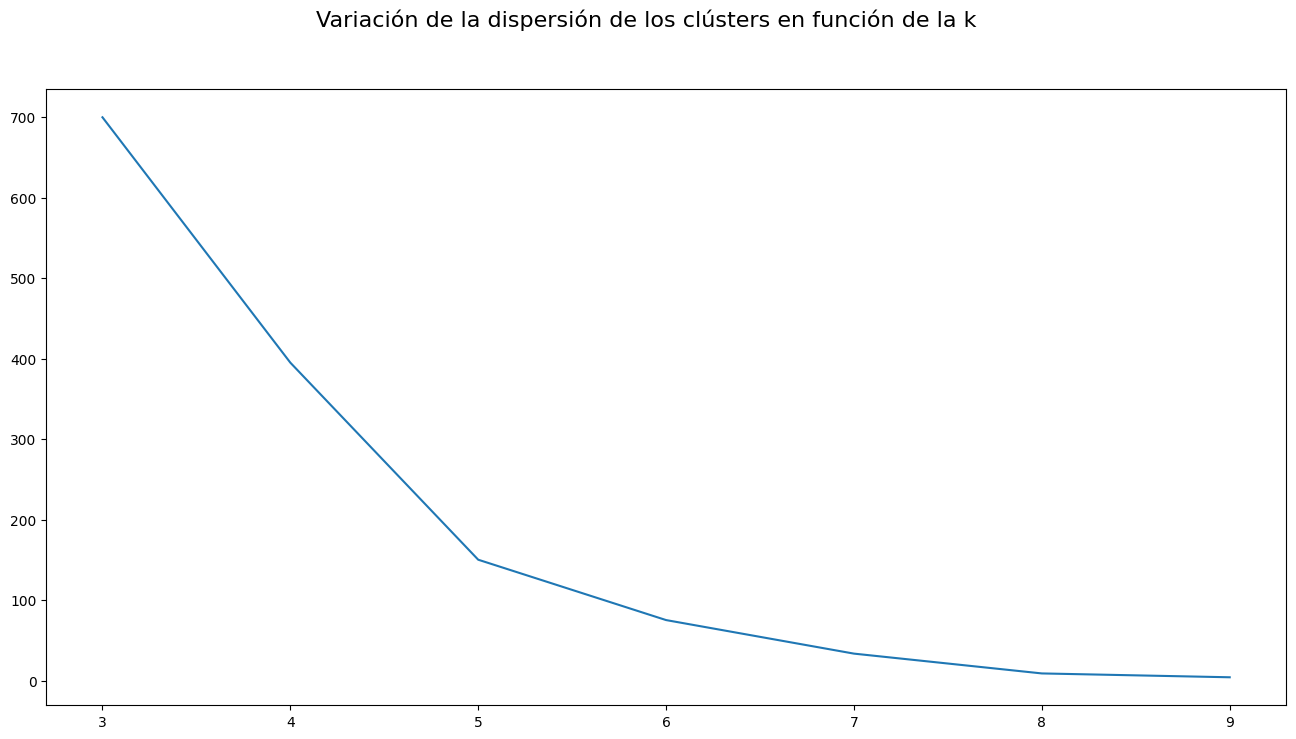

In [121]:
if CALCULATE_ELBOW:
    fig = plt.figure(figsize = (16, 8))
    ax = fig.add_subplot()

    x_values = list(sse.keys())
    y_values = list(sse.values())

    ax.plot(x_values, y_values, label = "Inertia/dispersión de los clústers")
    fig.suptitle("Variación de la dispersión de los clústers en función de la k", fontsize = 16);

In [122]:
#
pipe2 = Pipeline(steps = [
    ("ArrayToDataFrame", ArrayToDataFrame(columns, index = index)),
    ("MinMaxScaler", MinMaxScaler()),
    ("Clustering", KMeans(n_clusters = 5,random_state=42))
])

In [123]:
pipe2.fit(RECLUST)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('ArrayToDataFrame',
                 ArrayToDataFrame(columns=['SEGMENTO_ID', 'MEJOR_OPCION_ID',
                                           'CLUSTER_ID'],
                                  index=[1530496, 1127500, 1216841, 1005944,
                                         1014916, 1256318, 1171159, 1005847,
                                         1015210, 1011257, 1119296, 1265484,
                                         1166374, 1020891, 1119240, 1084996,
                                         1105904, 1005849, 1104760, 1008127,
                                         1259179, 1008849, 1258298, 1138460,
                                         1213217, 1083749, 1019848, 1147192,
                                         1003737, 1160260, ...])),
                ('MinMaxScaler', MinMaxScaler()),
                ('Clustering', KMeans(n_clusters=5, random_state=42))])

In [124]:
X_processed = pipe2["ArrayToDataFrame"].transform(RECLUST)
RECLUST_scaled = pipe2["MinMaxScaler"].transform(X_processed)

In [125]:
etiquetas = pipe2["Clustering"].predict(RECLUST_scaled)

In [126]:
RECLUST['CREATIVIDAD']=etiquetas

In [127]:
RECLUST

,SEGMENTO_ID,MEJOR_OPCION_ID,CLUSTER_ID,CREATIVIDAD
ID_USR,,,,
1530496,0,1,0,4
1127500,1,4,1,2
1216841,1,4,1,2
1005944,1,4,1,2
1014916,1,4,0,0
...,...,...,...,...
1119949,1,4,1,2
1157205,1,4,0,0
1123489,1,4,1,2


In [128]:
RECLUST_CAT= RECLUST.merge(USR_CAMPAÑA, on='ID_USR', how='left')

In [129]:
RECLUST_CAT

,ID_USR,SEGMENTO_ID,MEJOR_OPCION_ID,CLUSTER_ID,CREATIVIDAD,Unnamed: 0,CLUSTER,SEGMENTO,COM.AUTONOMA_ESP,MEJOR_OPCION,RETORNO_ESPERADO
0,1530496,0,1,0,4,0,CLIENTA TOP,01 - TOP,MADRID,INGRESOS PROD_HIPOTECA,60.000
1,1127500,1,4,1,2,1,CLIENTE TOP,02 - PARTICULARES,CDAD. VALENCIANA,INGRESOS PROD_TARJETA_DEBITO,55.832
2,1216841,1,4,1,2,2,CLIENTE TOP,02 - PARTICULARES,MADRID,INGRESOS PROD_TARJETA_DEBITO,55.551
3,1005944,1,4,1,2,3,CLIENTE TOP,02 - PARTICULARES,ANDALUCIA,INGRESOS PROD_TARJETA_DEBITO,54.150
4,1014916,1,4,0,0,4,CLIENTA TOP,02 - PARTICULARES,CASTILLA LA MANCHA,INGRESOS PROD_TARJETA_DEBITO,54.149
...,...,...,...,...,...,...,...,...,...,...,...
9995,1119949,1,4,1,2,9995,CLIENTE TOP,02 - PARTICULARES,ANDALUCIA,INGRESOS PROD_TARJETA_DEBITO,24.162
9996,1157205,1,4,0,0,9996,CLIENTA TOP,02 - PARTICULARES,ANDALUCIA,INGRESOS PROD_TARJETA_DEBITO,24.162
9997,1123489,1,4,1,2,9997,CLIENTE TOP,02 - PARTICULARES,ANDALUCIA,INGRESOS PROD_TARJETA_DEBITO,24.161
9998,1326206,1,4,1,2,9998,CLIENTE TOP,02 - PARTICULARES,ANDALUCIA,INGRESOS PROD_TARJETA_DEBITO,24.161


In [130]:
RECLUST_CAT.set_index("ID_USR", inplace = True)

In [131]:

lc = [

  'CREATIVIDAD', 
  'CLUSTER', 
  'SEGMENTO', 
  'MEJOR_OPCION', 

]

RECLUST_CAT = RECLUST_CAT[lc]

In [132]:
RECLUST_CAT

,CREATIVIDAD,CLUSTER,SEGMENTO,MEJOR_OPCION
ID_USR,,,,
1530496,4,CLIENTA TOP,01 - TOP,INGRESOS PROD_HIPOTECA
1127500,2,CLIENTE TOP,02 - PARTICULARES,INGRESOS PROD_TARJETA_DEBITO
1216841,2,CLIENTE TOP,02 - PARTICULARES,INGRESOS PROD_TARJETA_DEBITO
1005944,2,CLIENTE TOP,02 - PARTICULARES,INGRESOS PROD_TARJETA_DEBITO
1014916,0,CLIENTA TOP,02 - PARTICULARES,INGRESOS PROD_TARJETA_DEBITO
...,...,...,...,...
1119949,2,CLIENTE TOP,02 - PARTICULARES,INGRESOS PROD_TARJETA_DEBITO
1157205,0,CLIENTA TOP,02 - PARTICULARES,INGRESOS PROD_TARJETA_DEBITO
1123489,2,CLIENTE TOP,02 - PARTICULARES,INGRESOS PROD_TARJETA_DEBITO


In [133]:
CREATIVIDADES=RECLUST_CAT.groupby(('CREATIVIDAD'))

In [134]:
CREATIVIDADES.value_counts()

CREATIVIDAD  CLUSTER      SEGMENTO            MEJOR_OPCION                 
0            CLIENTA TOP  02 - PARTICULARES   INGRESOS PROD_TARJETA_DEBITO     2772
                          01 - TOP            INGRESOS PROD_TARJETA_DEBITO      100
                          02 - PARTICULARES   INGRESOS PROD_TARJETA_CREDITO      32
                                              INGRESOS PROD_PLAN_PENSIONES        3
                          01 - TOP            INGRESOS PROD_TARJETA_CREDITO       2
1            CLIENTE TOP  03 - UNIVERSITARIO  INGRESOS PROD_TARJETA_DEBITO     1416
                                              INGRESOS PROD_TARJETA_CREDITO       2
2            CLIENTE TOP  02 - PARTICULARES   INGRESOS PROD_TARJETA_DEBITO     3790
                          01 - TOP            INGRESOS PROD_TARJETA_DEBITO      157
                          02 - PARTICULARES   INGRESOS PROD_TARJETA_CREDITO      75
                          01 - TOP            INGRESOS PROD_TARJETA_CREDITO      17


In [135]:
RECLUST_CAT.to_csv("/content/drive/MyDrive/TFM/data/CREATIVIDADES")

In [136]:
RECLUST_CAT=pd.read_csv("/content/drive/MyDrive/TFM/data/CREATIVIDADES")

## **Creatividades 0 y 3**

### *Clienta TOP, por tanto mujer madura, activa, fiel, con varios productos.Interesada principalmente en tarjetas.*

### * Utilizaríamos imágenes de mujeres adultas jóvenes en situaciones que los estereotipos catalogarían de "exitosas" y "postuniversitarias" tales como riendo con un grupo de amigas adultas jóvenes, liderando una reunión de empresa... El mensaje sería de agradecimiento a su confianza y fidelidad con nosotros. Ahora que la hemos acompañado hasta este buen momento, le ofreceremos la tarjeta que hoy necesita, y para el futuro, su nuevo plan de pensiones.

## **Creatividad 1 y 2**

### *Cliente riesgo, por tanto hombre joven, inactivo, con pocos productos.*

### * Utilizaríamos imágenes de hombres jóvenes en situaciones que entenderíamos como de libertad y aventura, lejos de ataduras, como practicando deportes extremos, tomando unas copas de tardeo con amigas y amigos... El mensaje sería que le ofrecemos nuestras tarjetas (ambas) porque con ellas será más libre por todas las ventajas que tienen. Mencionaremos que también tenemos otros productos para su libertad en el futuro como los planes de pensiones, destacando sus ventajas fiscales.







***Nota: en la revisión para entrega, vemos que los cluster en estas creatividades se corresponden en realidad con CLIENTES TOP, no CLIENTES DE RIESGO. En este caso, la propuesta gráfica valdría, pero el mensaje iría en una línea similar a la creatividad anterior:***


*Utilizaríamos imágenes de hombres adultos jóvenes en situaciones que los estereotipos catalogarían de "exitosas", de felicidad, de triunfo. La idea es transmitir fuerza, independencia, libertad, modernidad. El mensaje sería de agradecimiento a su confianza y fidelidad con nosotros. Después de acompañarle  hasta este buen momento, le ofreceremos la tarjeta que hoy necesita.*



## **Creatividad 4**

### *Interesados e interesadas en vinculaciones de ahorro e inversión a largo plazo*

### * Utilizaríamos imágenes de hombres y mujeres jóvenes adultos, así como parejas, en situaciones en las que ganan o gastan dinero. Estrenando un coche, mudándose a una casa nueva, recibiendo las llaves de un nuevo negocio... Ofreceremos inversiones seguras mediante depósitos a largo plazo e hipotecas

#PROPUESTA DE MEDICION

In [137]:
#sumatorio retorno esperado
USR_CAMPAÑA['RETORNO_ESPERADO'].sum()

333993.52987692726

###Los KPI podrían establecerse por el embudo de conversión haitual:

1. Cuántos correos se han enviado (10.000 en un principio)

2. Cuántos han clicado en el correo para ir a la *landing page* ?

3. De estos, cuántos han solicitado más información?

4. De estos, cuántos han contratado finalmente?



Además, el KPI clave sería:

- Cuánto hemos comisionado con estos 10.000 clientes en total?

- En qué porcentaje se acerca esta cifra al retorno total esperado de 333.993€ ?

Este mismo cálculo de comisionado y porcentaje sobre el retorno esperado lo realizaríamos sobre otros grupos de control de 10.000 clientes a quienes no se les haya hecho campaña.

- La diferencia entre el porcentaje de nuestra campaña y el de estos grupos de control (que debería ser menor) nos permitirá cuantificar si la campaña ha supuesto un incremento en la conversión.